# CERTIFICAZIONE ENERGETICA

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
path = "Database_Certificazione_Energetica.csv"
data = pd.read_csv(path, low_memory=False)

In [5]:
data.head()

,COD_APE,DATA_INS,RESIDENZIALE,NON_RESIDENZIALE,COMUNE_CATASTALE,PROPRIETA_PUBBLICA,USO_PUBBLICO,CLASSIFICAZIONE_DPR,INTERO_EDIFICIO,UNITA_IMMOBILIARE,...,TPC_EPREN_2,TPC_EPNREN_2,SOPRALLUOGO,SW_REQUISITI,SW_SEMPLIFICATO,ENTE_PUBBLICO,TECNICO_ABILITATO,SOCIETA,TITOLO_CERT,ORDINE_CERT
0,1514604279524,10/09/2024,True,False,MILANO,False,False,E.1(1),False,True,...,0.0,0.0,True,True,False,False,True,False,Diploma di laurea in ingegneria,Ordine degli ingegneri
1,1510500019223,14/04/2023,True,False,GARBAGNATE MILANESE,False,False,E.1(1),False,True,...,0.0,0.0,True,True,False,False,True,False,Laurea magistrale in architettura,Ordine degli architetti
2,1515700036124,03/06/2024,True,False,NOVATE MILANESE,False,False,E.1(1),False,True,...,0.0,0.0,True,True,False,False,True,False,Laurea magistrale in architettura,Ordine degli architetti
3,1508100030817,18/05/2017,True,False,COLOGNO MONZESE,False,False,E.1(1),False,True,...,0.0,0.0,True,True,False,False,True,False,Diploma di geometra,Collegio dei geometri
4,1525000018124,04/06/2024,True,False,BARANZATE,False,False,E.1(1),False,True,...,0.0,0.0,True,True,False,False,True,False,Laurea magistrale in ingegneria,Ordine degli ingegneri


In [6]:
'''
data = pd.get_dummies(data, columns = ["RESIDENZIALE","PROPRIETA_PUBBLICA","USO_PUBBLICO","INTERO_EDIFICIO",
                                       "UNITA_IMMOBILIARE","GRUPPO_UNITA_IMMOBILIARI",
                                       "NUOVA_COSTRUZIONE","PASSAGGIO_PROPRIETA","LOCAZIONE","RISTRUTTURAZIONE_IMPORTANTE",
                                       "RIQUALIFICAZIONE_ENERGETICA","OGGETTO_ALTRO","CLIMATIZZAZIONE_INVERNALE",
                                       "CLIMATIZZAZIONE_ESTIVA","VENTILAZIONE_MECCANICA","PROD_ACQUA_CALDA_SANITARIA",
                                       "ILLUMINAZIONE","TRASPORTO_PERSONE_COSE","EDIFICIO_ENERGIA_QUASI_ZERO",])
                                       '''

'\ndata = pd.get_dummies(data, columns = ["RESIDENZIALE","PROPRIETA_PUBBLICA","USO_PUBBLICO","INTERO_EDIFICIO",\n                                       "UNITA_IMMOBILIARE","GRUPPO_UNITA_IMMOBILIARI",\n                                       "NUOVA_COSTRUZIONE","PASSAGGIO_PROPRIETA","LOCAZIONE","RISTRUTTURAZIONE_IMPORTANTE",\n                                       "RIQUALIFICAZIONE_ENERGETICA","OGGETTO_ALTRO","CLIMATIZZAZIONE_INVERNALE",\n                                       "CLIMATIZZAZIONE_ESTIVA","VENTILAZIONE_MECCANICA","PROD_ACQUA_CALDA_SANITARIA",\n                                       "ILLUMINAZIONE","TRASPORTO_PERSONE_COSE","EDIFICIO_ENERGIA_QUASI_ZERO",])\n                                       '

In [7]:
data["ORDINE_CERT"].value_counts()

ORDINE_CERT
Collegio dei geometri                       777227
Ordine degli ingegneri                      431292
Ordine degli architetti                     406188
Collegio dei periti industriali             139588
Altro                                        95353
Ordine dei chimici                            3557
Ordine degli agronomi                         2652
Collegio dei periti agrari                    1966
Associazione italiana scienze ambientali       475
Name: count, dtype: int64

In [8]:
data["TITOLO_CERT"].value_counts()

TITOLO_CERT
Diploma di geometra                                                                                        881289
Laurea magistrale in ingegneria                                                                            320453
Diploma di laurea in architettura                                                                          261108
Laurea magistrale in architettura                                                                          200424
Diploma di laurea in ingegneria                                                                            165585
Diploma di perito industriale o di istruzione tecnica                                                      150506
Laurea magistrale in scienze chimiche                                                                        3961
Diploma di laurea in scienze e tecniche dell''edilizia                                                       3699
Laurea magistrale in pianificazione territoriale ed urbanistica             

In [9]:
data["TRASPORTO_PERSONE_COSE"].value_counts()

TRASPORTO_PERSONE_COSE
False    1961868
True       35782
Name: count, dtype: int64

## Data cleaning

In [10]:
nan_counts = data.isna().sum()

In [11]:
for column, n_nan in nan_counts.items():
    print(f"Colonna {column} has N of NaN:{n_nan}")

Colonna COD_APE has N of NaN:0
Colonna DATA_INS has N of NaN:0
Colonna RESIDENZIALE has N of NaN:0
Colonna NON_RESIDENZIALE has N of NaN:0
Colonna COMUNE_CATASTALE has N of NaN:0
Colonna PROPRIETA_PUBBLICA has N of NaN:0
Colonna USO_PUBBLICO has N of NaN:0
Colonna CLASSIFICAZIONE_DPR has N of NaN:0
Colonna INTERO_EDIFICIO has N of NaN:0
Colonna UNITA_IMMOBILIARE has N of NaN:0
Colonna GRUPPO_UNITA_IMMOBILIARI has N of NaN:0
Colonna NUMERO_UNITA_IMMOBILIARI has N of NaN:0
Colonna NUOVA_COSTRUZIONE has N of NaN:0
Colonna PASSAGGIO_PROPRIETA has N of NaN:0
Colonna LOCAZIONE has N of NaN:0
Colonna RISTRUTTURAZIONE_IMPORTANTE has N of NaN:0
Colonna RIQUALIFICAZIONE_ENERGETICA has N of NaN:0
Colonna OGGETTO_ALTRO has N of NaN:0
Colonna OGGETTO_ALTRO_TXT has N of NaN:921003
Colonna REGIONE has N of NaN:0
Colonna COMUNE has N of NaN:0
Colonna PIANO has N of NaN:552107
Colonna INTERNO has N of NaN:1925170
Colonna ZONA_CLIMATICA has N of NaN:0
Colonna ANNO_COSTRUZIONE has N of NaN:0
Colonna SUPE

In [12]:
orderd_nan = sorted(nan_counts, reverse= True)
orderd_nan

[1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1997650,
 1992974,
 1992974,
 1986317,
 1986317,
 1986317,
 1986317,
 1986317,
 1986317,
 1985286,
 1985286,
 1985286,
 1985286,
 1985286,
 1985286,
 1976149,
 1976149,
 1947004,
 1947004,
 1947004,
 1947004,
 1925170,
 1885047,
 1844962,
 1844962,
 1844962,
 1844962,
 1844962,
 1844962,
 1844368,
 1830615,
 1814384,
 1802374,
 1802374,
 1802374,
 1799920,
 1790894,
 1790881,
 1790881,
 1788907,
 1788907,
 1788907,
 1788907,
 1788907,
 1788907,
 1788121,
 1590853,
 1590570,
 1590570,
 1348503,
 1348501,
 1344534,
 1344534,
 1211158,
 1211158,
 1211158,
 1211158,
 1211158,
 1211158,
 1117121,
 1117121,
 1117121,
 1117121,
 1117121,
 1117121,
 1117121,
 1117121,
 921003,
 849629,
 849629,
 849629,
 849629,
 849629,
 849629,
 552107,
 266119,

In [13]:
n_Nan = 785081
columns_with_nan = nan_counts[nan_counts <= n_Nan ].index

In [14]:
columns_with_nan

Index(['COD_APE', 'DATA_INS', 'RESIDENZIALE', 'NON_RESIDENZIALE',
       'COMUNE_CATASTALE', 'PROPRIETA_PUBBLICA', 'USO_PUBBLICO',
       'CLASSIFICAZIONE_DPR', 'INTERO_EDIFICIO', 'UNITA_IMMOBILIARE',
       'GRUPPO_UNITA_IMMOBILIARI', 'NUMERO_UNITA_IMMOBILIARI',
       'NUOVA_COSTRUZIONE', 'PASSAGGIO_PROPRIETA', 'LOCAZIONE',
       'RISTRUTTURAZIONE_IMPORTANTE', 'RIQUALIFICAZIONE_ENERGETICA',
       'OGGETTO_ALTRO', 'REGIONE', 'COMUNE', 'PIANO', 'ZONA_CLIMATICA',
       'ANNO_COSTRUZIONE', 'SUPERF_UTILE_RISCALDATA',
       'SUPERF_UTILE_RAFFRESCATA', 'VOLUME_LORDO_RISCALDATO',
       'VOLUME_LORDO_RAFFRESCATO', 'CLIMATIZZAZIONE_INVERNALE',
       'CLIMATIZZAZIONE_ESTIVA', 'VENTILAZIONE_MECCANICA',
       'PROD_ACQUA_CALDA_SANITARIA', 'ILLUMINAZIONE', 'TRASPORTO_PERSONE_COSE',
       'PI', 'PE', 'EDIFICIO_ENERGIA_QUASI_ZERO', 'CLASSE_ENERGETICA',
       'EP_GL_NREN', 'Y', 'EP_GL_REN', 'EMISSIONI_CO2',
       'CONSUMI_ENERGIA_ELETTRICA', 'CONSUMI_GAS_NATURALE', 'CONSUMI_GPL',
       'CO

In [15]:
data_with_nan = data[columns_with_nan]
data_with_nan.head()

,COD_APE,DATA_INS,RESIDENZIALE,NON_RESIDENZIALE,COMUNE_CATASTALE,PROPRIETA_PUBBLICA,USO_PUBBLICO,CLASSIFICAZIONE_DPR,INTERO_EDIFICIO,UNITA_IMMOBILIARE,...,TPC_EPREN_2,TPC_EPNREN_2,SOPRALLUOGO,SW_REQUISITI,SW_SEMPLIFICATO,ENTE_PUBBLICO,TECNICO_ABILITATO,SOCIETA,TITOLO_CERT,ORDINE_CERT
0,1514604279524,10/09/2024,True,False,MILANO,False,False,E.1(1),False,True,...,0.0,0.0,True,True,False,False,True,False,Diploma di laurea in ingegneria,Ordine degli ingegneri
1,1510500019223,14/04/2023,True,False,GARBAGNATE MILANESE,False,False,E.1(1),False,True,...,0.0,0.0,True,True,False,False,True,False,Laurea magistrale in architettura,Ordine degli architetti
2,1515700036124,03/06/2024,True,False,NOVATE MILANESE,False,False,E.1(1),False,True,...,0.0,0.0,True,True,False,False,True,False,Laurea magistrale in architettura,Ordine degli architetti
3,1508100030817,18/05/2017,True,False,COLOGNO MONZESE,False,False,E.1(1),False,True,...,0.0,0.0,True,True,False,False,True,False,Diploma di geometra,Collegio dei geometri
4,1525000018124,04/06/2024,True,False,BARANZATE,False,False,E.1(1),False,True,...,0.0,0.0,True,True,False,False,True,False,Laurea magistrale in ingegneria,Ordine degli ingegneri


In [16]:
n_nan = data_with_nan.isna().sum().sort_values(ascending=False)
for col, n in n_nan.items():
    print(f"Column {col}: {n}")

Column PIANO: 552107
Column TPC_EPREN_1: 266119
Column TPC_EFFICIENZA_MEDIA_1: 266119
Column TPC_EPNREN_2: 266119
Column TPC_EPREN_2: 266119
Column TPC_EFFICIENZA_MEDIA_2: 266119
Column TPC_EPNREN_1: 266119
Column PA_ANNO_INSTALLAZIONE: 181492
Column PA_POTENZA_NOMINALE: 178001
Column CI_ANNO_INSTALLAZIONE_1: 177561
Column CI_POTENZA_NOMINALE_1: 177215
Column PA_TIPO_IMPIANTO: 172039
Column PA_VETTORE_ENERGETICO: 172039
Column ORDINE_CERT: 139352
Column Y: 61993
Column CI_VETTORE_ENERGETICO_1: 57996
Column CI_TIPO_IMPIANTO_1: 57996
Column CONSUMI_BIOMASSE_LIQUIDE: 47857
Column CONSUMI_TELERAFFRESCAMENTO: 47857
Column CONSUMI_CARBONE: 47857
Column CONSUMI_BIOMASSE_SOLIDE: 47857
Column CONSUMI_ALTRO: 47857
Column CONSUMI_SOLARE_TERMICO: 47857
Column CONSUMI_GASOLIO: 47300
Column CONSUMI_GPL: 47300
Column ILL_POTENZA_NOMINALE: 36879
Column TECNICO_ABILITATO: 141
Column SOCIETA: 141
Column ENTE_PUBBLICO: 141
Column RAPPORTO_SV: 2
Column CONSUMI_GAS_NATURALE: 1
Column SUPERFICIE_DISPERDENTE

In [17]:
col_nan = n_nan[n_nan>0].index
col_nan

Index(['PIANO', 'TPC_EPREN_1', 'TPC_EFFICIENZA_MEDIA_1', 'TPC_EPNREN_2',
       'TPC_EPREN_2', 'TPC_EFFICIENZA_MEDIA_2', 'TPC_EPNREN_1',
       'PA_ANNO_INSTALLAZIONE', 'PA_POTENZA_NOMINALE',
       'CI_ANNO_INSTALLAZIONE_1', 'CI_POTENZA_NOMINALE_1', 'PA_TIPO_IMPIANTO',
       'PA_VETTORE_ENERGETICO', 'ORDINE_CERT', 'Y', 'CI_VETTORE_ENERGETICO_1',
       'CI_TIPO_IMPIANTO_1', 'CONSUMI_BIOMASSE_LIQUIDE',
       'CONSUMI_TELERAFFRESCAMENTO', 'CONSUMI_CARBONE',
       'CONSUMI_BIOMASSE_SOLIDE', 'CONSUMI_ALTRO', 'CONSUMI_SOLARE_TERMICO',
       'CONSUMI_GASOLIO', 'CONSUMI_GPL', 'ILL_POTENZA_NOMINALE',
       'TECNICO_ABILITATO', 'SOCIETA', 'ENTE_PUBBLICO', 'RAPPORTO_SV',
       'CONSUMI_GAS_NATURALE'],
      dtype='object')

In [18]:
n_nan[n_nan==0].index

Index(['SUPERFICIE_DISPERDENTE', 'EP_H_ND', 'A_SOL_EST_A_SUP_UTILE', 'Y_IE',
       'ENERGIA_ESPORTATA', 'SOPRALLUOGO', 'TITOLO_CERT', 'ILL_EPNREN',
       'CI_EPREN', 'CI_EPNREN', 'CE_EFFICIENZA_MEDIA', 'CE_EPREN', 'CE_EPNREN',
       'SW_SEMPLIFICATO', 'PA_EFFICIENZA_MEDIA', 'PA_EPREN', 'PA_EPNREN',
       'SW_REQUISITI', 'VM_EPREN', 'VM_EPNREN', 'ILL_EPREN',
       'CI_EFFICIENZA_MEDIA', 'COD_APE', 'CONSUMI_TELERISCALDAMENTO',
       'NUMERO_UNITA_IMMOBILIARI', 'COMUNE', 'REGIONE', 'OGGETTO_ALTRO',
       'RIQUALIFICAZIONE_ENERGETICA', 'RISTRUTTURAZIONE_IMPORTANTE',
       'LOCAZIONE', 'PASSAGGIO_PROPRIETA', 'NUOVA_COSTRUZIONE',
       'GRUPPO_UNITA_IMMOBILIARI', 'ANNO_COSTRUZIONE', 'UNITA_IMMOBILIARE',
       'INTERO_EDIFICIO', 'CLASSIFICAZIONE_DPR', 'USO_PUBBLICO',
       'PROPRIETA_PUBBLICA', 'COMUNE_CATASTALE', 'NON_RESIDENZIALE',
       'RESIDENZIALE', 'ZONA_CLIMATICA', 'SUPERF_UTILE_RISCALDATA',
       'CONSUMI_EOLICO', 'PE', 'CONSUMI_SOLARE_FOTOVOLTAICO', 'DATA_INS',
       '

In [19]:
len(col_nan)

31

In [20]:
'''
columns_interested = ["COD_APE","CONSUMI_ENERGIA_ELETTRICA","CONSUMI_GAS_NATURALE","CONSUMI_GPL","CONSUMI_CARBONE","CONSUMI_GASOLIO",
       "CONSUMI_BIOMASSE_SOLIDE","CONSUMI_BIOMASSE_LIQUIDE","CONSUMI_BIOMASSE_GASSOSE","CONSUMI_SOLARE_FOTOVOLTAICO",
       "CONSUMI_SOLARE_TERMICO","CONSUMI_EOLICO","CONSUMI_TELERISCALDAMENTO","CONSUMI_TELERAFFRESCAMENTO","CONSUMI_ALTRO",
       "USO_PUBBLICO","RESIDENZIALE", "PROPRIETA_PUBBLICA","NUMERO_UNITA_IMMOBILIARI","COMUNE_CATASTALE",
       "PI","PE","EDIFICIO_ENERGIA_QUASI_ZERO","CLASSE_ENERGETICA","EP_GL_NREN","EP_GL_REN","EMISSIONI_CO2","RIQ_CLASSE_RAGG",
       "DS_TIPO_INTERVENTO_1","DS_TIPO_INTERVENTO_2","DS_TIPO_INTERVENTO_3","DS_TIPO_INTERVENTO_4","DS_TIPO_INTERVENTO_5","DS_TIPO_INTERVENTO_6",
       "DS_TIPO_INTERVENTO_7","ENERGIA_ESPORTATA","VETTORE_ENERGETICO","SUPERFICIE_DISPERDENTE","RAPPORTO_SV","EP_H_ND","A_SOL_EST_A_SUP_UTILE",
       "CI_TIPO_IMPIANTO_1","CI_TIPO_IMPIANTO_2","Y_IE","CI_VETTORE_ENERGETICO_1","CI_VETTORE_ENERGETICO_2","CI_POTENZA_NOMINALE_1","CI_EFFICIENZA_MEDIA",
       "RISTRUTTURAZIONE_IMPORTANTE","RIQUALIFICAZIONE_ENERGETICA","ZONA_CLIMATICA","TITOLO_CERT","ORDINE_CERT","TECNICO_ABILITATO"]
'''

'\ncolumns_interested = ["COD_APE","CONSUMI_ENERGIA_ELETTRICA","CONSUMI_GAS_NATURALE","CONSUMI_GPL","CONSUMI_CARBONE","CONSUMI_GASOLIO",\n       "CONSUMI_BIOMASSE_SOLIDE","CONSUMI_BIOMASSE_LIQUIDE","CONSUMI_BIOMASSE_GASSOSE","CONSUMI_SOLARE_FOTOVOLTAICO",\n       "CONSUMI_SOLARE_TERMICO","CONSUMI_EOLICO","CONSUMI_TELERISCALDAMENTO","CONSUMI_TELERAFFRESCAMENTO","CONSUMI_ALTRO",\n       "USO_PUBBLICO","RESIDENZIALE", "PROPRIETA_PUBBLICA","NUMERO_UNITA_IMMOBILIARI","COMUNE_CATASTALE",\n       "PI","PE","EDIFICIO_ENERGIA_QUASI_ZERO","CLASSE_ENERGETICA","EP_GL_NREN","EP_GL_REN","EMISSIONI_CO2","RIQ_CLASSE_RAGG",\n       "DS_TIPO_INTERVENTO_1","DS_TIPO_INTERVENTO_2","DS_TIPO_INTERVENTO_3","DS_TIPO_INTERVENTO_4","DS_TIPO_INTERVENTO_5","DS_TIPO_INTERVENTO_6",\n       "DS_TIPO_INTERVENTO_7","ENERGIA_ESPORTATA","VETTORE_ENERGETICO","SUPERFICIE_DISPERDENTE","RAPPORTO_SV","EP_H_ND","A_SOL_EST_A_SUP_UTILE",\n       "CI_TIPO_IMPIANTO_1","CI_TIPO_IMPIANTO_2","Y_IE","CI_VETTORE_ENERGETICO_1","CI_VETTO

In [21]:
columns_interested = ["RESIDENZIALE","COMUNE_CATASTALE","USO_PUBBLICO","CLASSIFICAZIONE_DPR","NUMERO_UNITA_IMMOBILIARI","VOLUME_LORDO_RISCALDATO",
                      "VOLUME_LORDO_RAFFRESCATO","CLIMATIZZAZIONE_ESTIVA","VENTILAZIONE_MECCANICA","PROD_ACQUA_CALDA_SANITARIA","ILLUMINAZIONE","ANNO_COSTRUZIONE",
                      "TRASPORTO_PERSONE_COSE","EDIFICIO_ENERGIA_QUASI_ZERO","CLASSE_ENERGETICA","EMISSIONI_CO2","CONSUMI_ENERGIA_ELETTRICA","CONSUMI_GAS_NATURALE","CONSUMI_GPL",
                      "CONSUMI_CARBONE","CONSUMI_GASOLIO","CONSUMI_BIOMASSE_SOLIDE","CONSUMI_BIOMASSE_LIQUIDE","CONSUMI_SOLARE_FOTOVOLTAICO", "CONSUMI_SOLARE_TERMICO", 
                      "CONSUMI_TELERISCALDAMENTO","CONSUMI_ALTRO", "DS_TIPO_INTERVENTO_1","DS_TIPO_INTERVENTO_2","DS_TIPO_INTERVENTO_3",
                      "DS_TIPO_INTERVENTO_4","DS_TIPO_INTERVENTO_5","DS_TIPO_INTERVENTO_6","DS_TIPO_INTERVENTO_7","RAPPORTO_SV","ENERGIA_ESPORTATA","TITOLO_CERT","ORDINE_CERT","TECNICO_ABILITATO"
                        ]
len(columns_interested)

39

In [22]:
data = data[columns_interested]

In [23]:
translation_dict = {
    "RESIDENZIALE": "Residential",
    "COMUNE_CATASTALE": "Cadastral Municipality",
    "USO_PUBBLICO": "Public Use",
    "CLASSIFICAZIONE_DPR": "DPR Classification",
    "NUMERO_UNITA_IMMOBILIARI": "Number of Real Estate Units",
    "VOLUME_LORDO_RISCALDATO": "Gross Heated Volume",
    "VOLUME_LORDO_RAFFRESCATO": "Gross Cooled Volume",
    "CLIMATIZZAZIONE_ESTIVA": "Summer Air Conditioning",
    "VENTILAZIONE_MECCANICA": "Mechanical Ventilation",
    "PROD_ACQUA_CALDA_SANITARIA": "Hot Sanitary Water Production",
    "ILLUMINAZIONE": "Lighting",
    "ANNO_COSTRUZIONE": "Year of Construction",
    "TRASPORTO_PERSONE_COSE": "Transport of People and Goods",
    "EDIFICIO_ENERGIA_QUASI_ZERO": "Nearly Zero Energy Building",
    "CLASSE_ENERGETICA": "Energy Class",
    "EMISSIONI_CO2": "CO2 Emissions",
    "CONSUMI_ENERGIA_ELETTRICA": "Electricity Consumption",
    "CONSUMI_GAS_NATURALE": "Natural Gas Consumption",
    "CONSUMI_GPL": "LPG Consumption",
    "CONSUMI_CARBONE": "Coal Consumption",
    "CONSUMI_GASOLIO": "Diesel Consumption",
    "CONSUMI_BIOMASSE_SOLIDE": "Solid Biomass Consumption",
    "CONSUMI_BIOMASSE_LIQUIDE": "Liquid Biomass Consumption",
    "CONSUMI_SOLARE_FOTOVOLTAICO": "Photovoltaic Solar Consumption",
    "CONSUMI_SOLARE_TERMICO": "Solar Thermal Consumption",
    "CONSUMI_TELERISCALDAMENTO": "District Heating Consumption",
    "CONSUMI_ALTRO": "Other Consumption",
    "DS_TIPO_INTERVENTO_1": "Intervention Type 1",
    "DS_TIPO_INTERVENTO_2": "Intervention Type 2",
    "DS_TIPO_INTERVENTO_3": "Intervention Type 3",
    "DS_TIPO_INTERVENTO_4": "Intervention Type 4",
    "DS_TIPO_INTERVENTO_5": "Intervention Type 5",
    "DS_TIPO_INTERVENTO_6": "Intervention Type 6",
    "DS_TIPO_INTERVENTO_7": "Intervention Type 7",
    "RAPPORTO_SV": "SV Ratio",
    "ENERGIA_ESPORTATA": "Exported Energy",
    "TITOLO_CERT": "Certificate Title",
    "ORDINE_CERT": "Certificate Order",
    "TECNICO_ABILITATO": "Qualified Technician"
}

In [24]:
new_data = data.rename(columns=translation_dict)

In [25]:
new_data.head(5)

,Residential,Cadastral Municipality,Public Use,DPR Classification,Number of Real Estate Units,Gross Heated Volume,Gross Cooled Volume,Summer Air Conditioning,Mechanical Ventilation,Hot Sanitary Water Production,...,Intervention Type 3,Intervention Type 4,Intervention Type 5,Intervention Type 6,Intervention Type 7,SV Ratio,Exported Energy,Certificate Title,Certificate Order,Qualified Technician
0,True,MILANO,False,E.1(1),12,455.55,455.55,True,True,True,...,NaN,NaN,NaN,Fonti rinnovabili,NaN,0.2522,0.00,Diploma di laurea in ingegneria,Ordine degli ingegneri,True
1,True,GARBAGNATE MILANESE,False,E.1(1),28,328.48,328.48,True,False,True,...,NaN,NaN,NaN,NaN,NaN,0.3421,108.82,Laurea magistrale in architettura,Ordine degli architetti,True
2,True,NOVATE MILANESE,False,E.1(1),125,194.70,0.00,False,False,True,...,NaN,NaN,Altri impianti,NaN,Cumulativo,0.3296,0.00,Laurea magistrale in architettura,Ordine degli architetti,True
3,True,COLOGNO MONZESE,False,E.1(1),1,318.10,318.10,True,False,True,...,NaN,NaN,NaN,NaN,Cumulativo,0.3766,0.00,Diploma di geometra,Collegio dei geometri,True
4,True,BARANZATE,False,E.1(1),83,343.63,0.00,False,False,True,...,NaN,NaN,NaN,NaN,NaN,0.3155,0.00,Laurea magistrale in ingegneria,Ordine degli ingegneri,True


In [26]:
new_data.shape

(1997650, 39)

In [27]:
list_certificate_order = list(set(new_data["Certificate Order"].values))
for i in list_certificate_order:
    print(i)


Ordine degli architetti
Ordine degli ingegneri
Collegio dei periti agrari
Associazione italiana scienze ambientali
nan
Collegio dei geometri
Altro
Collegio dei periti industriali
Ordine degli agronomi
Ordine dei chimici


In [28]:
translation_dict = {
    "Collegio dei periti agrari": "College of Agricultural Experts",
    "Associazione italiana scienze ambientali": "Italian Association of Environmental Sciences",
    "Ordine dei chimici": "Order of Chemists",
    "Altro": "Other",
    "Ordine degli architetti": "Order of Architects",
    "Ordine degli ingegneri": "Order of Engineers",
    "Collegio dei periti industriali": "College of Industrial Experts",
    "Collegio dei geometri": "College of Surveyors",
    "Ordine degli agronomi": "Order of Agronomists"
}
new_data["Certificate Order"] = new_data["Certificate Order"].replace(translation_dict)


In [29]:
list_certificate_title = list(set(new_data["Certificate Title"].values))
for i in list_certificate_title:
    print(i)


Diploma di laurea in scienze e tecniche dell''edilizia
Laurea magistrale in scienze della natura
Diploma di laurea in scienze della pianificazione territoriale, urbanistica, paesaggistica e ambientale
Diploma di laurea in scienze e tecnologie agrarie e forestali
Diploma di perito industriale o di istruzione tecnica
Diploma di perito agrario
Laurea magistrale in scienze ambientali
Agrotecnico
Laurea magistrale in scienze e tecnologie forestali e ambientali
Laurea magistrale in pianificazione territoriale ed urbanistica
Laurea magistrale in ingegneria
Diploma di laurea in scienze e tecnologie per l''ambiente e la natura
Laurea magistrale in scienze chimiche
Laurea magistrale in scienze e tecnologie agrarie
Diploma di geometra
Laurea magistrale in scienze e tecnologie geologiche
Diploma di tecnico superiore - Area efficienza energetica
Laurea magistrale in fisica
Laurea magistrale in scienze e tecnologie della chimica industriale
Diploma di laurea in scienze geologiche
Diploma di laurea i

In [30]:
translation_dict = {
    "Diploma di laurea in ingegneria": "Bachelor's Degree in Engineering",
    "Laurea magistrale in scienze della natura": "Master's Degree in Natural Sciences",
    "Diploma di geometra": "Surveyor's Diploma",
    "Diploma di laurea in scienze e tecnologie agrarie e forestali": "Bachelor's Degree in Agricultural and Forestry Sciences and Technologies",
    "Laurea magistrale in scienze e tecnologie agrarie": "Master's Degree in Agricultural Sciences and Technologies",
    "Laurea magistrale in ingegneria": "Master's Degree in Engineering",
    "Diploma di laurea in scienze e tecniche dell'edilizia": "Bachelor's Degree in Building Sciences and Techniques",
    "Laurea magistrale in architettura": "Master's Degree in Architecture",
    "Laurea magistrale in scienze e tecnologie geologiche": "Master's Degree in Geological Sciences and Technologies",
    "Laurea magistrale in fisica": "Master's Degree in Physics",
    "Diploma di laurea in scienze geologiche": "Bachelor's Degree in Geological Sciences",
    "Diploma di perito industriale o di istruzione tecnica": "Industrial Expert Diploma or Technical Education",
    "Diploma di laurea in scienze e tecnologie per l'ambiente e la natura": "Bachelor's Degree in Environmental and Nature Sciences and Technologies",
    "Laurea magistrale in scienze e tecnologie forestali e ambientali": "Master's Degree in Forestry and Environmental Sciences and Technologies",
    "Laurea magistrale in scienze e tecnologie della chimica industriale": "Master's Degree in Industrial Chemistry Sciences and Technologies",
    "Laurea magistrale in scienze ambientali": "Master's Degree in Environmental Sciences",
    "Diploma di laurea in architettura": "Bachelor's Degree in Architecture",
    "Diploma di perito agrario": "Agricultural Expert Diploma",
    "Laurea magistrale in pianificazione territoriale ed urbanistica": "Master's Degree in Territorial and Urban Planning",
    "Diploma di laurea in scienze della pianificazione territoriale, urbanistica, paesaggistica e ambientale": "Bachelor's Degree in Territorial, Urban, Landscape, and Environmental Planning Sciences",
    "Laurea magistrale in scienze chimiche": "Master's Degree in Chemistry",
    "Diploma di tecnico superiore - Area efficienza energetica": "Advanced Technician Diploma - Energy Efficiency Area"
}
new_data["Certificate Title"] = new_data["Certificate Title"].replace(translation_dict)

In [31]:
new_data.head(5)

,Residential,Cadastral Municipality,Public Use,DPR Classification,Number of Real Estate Units,Gross Heated Volume,Gross Cooled Volume,Summer Air Conditioning,Mechanical Ventilation,Hot Sanitary Water Production,...,Intervention Type 3,Intervention Type 4,Intervention Type 5,Intervention Type 6,Intervention Type 7,SV Ratio,Exported Energy,Certificate Title,Certificate Order,Qualified Technician
0,True,MILANO,False,E.1(1),12,455.55,455.55,True,True,True,...,NaN,NaN,NaN,Fonti rinnovabili,NaN,0.2522,0.00,Bachelor's Degree in Engineering,Order of Engineers,True
1,True,GARBAGNATE MILANESE,False,E.1(1),28,328.48,328.48,True,False,True,...,NaN,NaN,NaN,NaN,NaN,0.3421,108.82,Master's Degree in Architecture,Order of Architects,True
2,True,NOVATE MILANESE,False,E.1(1),125,194.70,0.00,False,False,True,...,NaN,NaN,Altri impianti,NaN,Cumulativo,0.3296,0.00,Master's Degree in Architecture,Order of Architects,True
3,True,COLOGNO MONZESE,False,E.1(1),1,318.10,318.10,True,False,True,...,NaN,NaN,NaN,NaN,Cumulativo,0.3766,0.00,Surveyor's Diploma,College of Surveyors,True
4,True,BARANZATE,False,E.1(1),83,343.63,0.00,False,False,True,...,NaN,NaN,NaN,NaN,NaN,0.3155,0.00,Master's Degree in Engineering,Order of Engineers,True


In [32]:
new_data["Intervention Type 1"].value_counts()

Intervention Type 1
Fabbricato - involucro opaco    1148021
Name: count, dtype: int64

In [33]:
new_data.shape

(1997650, 39)

In [34]:
new_data["Year of Construction"].value_counts(ascending=False)

Year of Construction
1961-1976         373356
1977-1992         185968
1946-1960         174883
Prima del 1930    146234
1993-2006         140995
                   ...  
1622                   1
1807                   1
1478                   1
1808                   1
1852                   1
Name: count, Length: 371, dtype: int64

In [35]:
new_data["Year of Construction"].isna().sum()

0

In [36]:
dict_year = {"Prima del 1930":1,"1930-1945":2,"1946-1960":3,"1961-1976":4,"1977-1992":5,"1993-2006":6,"Dopo il 2006":7}
new_data["Year of Construction"] = new_data["Year of Construction"].replace(dict_year)
new_data["Year of Construction"] = new_data["Year of Construction"].astype(int)

conditions = [
    new_data['Year of Construction'] < 1930,  # Less than 87
    (new_data['Year of Construction'] >= 1930) & (new_data['Year of Construction'] <= 1945),  # 87 to 120 inclusive
    (new_data['Year of Construction'] > 1945) & (new_data['Year of Construction'] <= 1961),
    (new_data['Year of Construction'] >= 1961) & (new_data['Year of Construction'] <= 1976),  # 87 to 120 inclusive
    (new_data['Year of Construction'] > 1976) & (new_data['Year of Construction'] <= 1992),
    (new_data['Year of Construction'] > 1992) & (new_data['Year of Construction'] <= 2006),
    new_data['Year of Construction'] > 2006  # Greater than 200
]
labels = [1, 2, 3, 4, 5,6,7]

# Assign classes based on conditions
new_data['Year of Construction'] = np.select(conditions, labels)

new_data.head(5)

,Residential,Cadastral Municipality,Public Use,DPR Classification,Number of Real Estate Units,Gross Heated Volume,Gross Cooled Volume,Summer Air Conditioning,Mechanical Ventilation,Hot Sanitary Water Production,...,Intervention Type 3,Intervention Type 4,Intervention Type 5,Intervention Type 6,Intervention Type 7,SV Ratio,Exported Energy,Certificate Title,Certificate Order,Qualified Technician
0,True,MILANO,False,E.1(1),12,455.55,455.55,True,True,True,...,NaN,NaN,NaN,Fonti rinnovabili,NaN,0.2522,0.00,Bachelor's Degree in Engineering,Order of Engineers,True
1,True,GARBAGNATE MILANESE,False,E.1(1),28,328.48,328.48,True,False,True,...,NaN,NaN,NaN,NaN,NaN,0.3421,108.82,Master's Degree in Architecture,Order of Architects,True
2,True,NOVATE MILANESE,False,E.1(1),125,194.70,0.00,False,False,True,...,NaN,NaN,Altri impianti,NaN,Cumulativo,0.3296,0.00,Master's Degree in Architecture,Order of Architects,True
3,True,COLOGNO MONZESE,False,E.1(1),1,318.10,318.10,True,False,True,...,NaN,NaN,NaN,NaN,Cumulativo,0.3766,0.00,Surveyor's Diploma,College of Surveyors,True
4,True,BARANZATE,False,E.1(1),83,343.63,0.00,False,False,True,...,NaN,NaN,NaN,NaN,NaN,0.3155,0.00,Master's Degree in Engineering,Order of Engineers,True


In [37]:
n_nan = new_data.isna().sum()
col_nan = n_nan[n_nan>0].index
col_nan

Index(['Natural Gas Consumption', 'LPG Consumption', 'Coal Consumption',
       'Diesel Consumption', 'Solid Biomass Consumption',
       'Liquid Biomass Consumption', 'Solar Thermal Consumption',
       'Other Consumption', 'Intervention Type 1', 'Intervention Type 2',
       'Intervention Type 3', 'Intervention Type 4', 'Intervention Type 5',
       'Intervention Type 6', 'Intervention Type 7', 'SV Ratio',
       'Certificate Order', 'Qualified Technician'],
      dtype='object')

In [38]:
len(col_nan)

18

In [39]:
'''
variabili_categoriche_nan = ['RIQ_CLASSE_RAGG', 'VETTORE_ENERGETICO', 'CI_TIPO_IMPIANTO_1',
       'CI_TIPO_IMPIANTO_2', 'CI_VETTORE_ENERGETICO_1',
       'CI_VETTORE_ENERGETICO_2']
'''

"\nvariabili_categoriche_nan = ['RIQ_CLASSE_RAGG', 'VETTORE_ENERGETICO', 'CI_TIPO_IMPIANTO_1',\n       'CI_TIPO_IMPIANTO_2', 'CI_VETTORE_ENERGETICO_1',\n       'CI_VETTORE_ENERGETICO_2']\n"

In [40]:
'''
new_data = new_data.drop(columns=['RIQ_CLASSE_RAGG', 'VETTORE_ENERGETICO', 'CI_TIPO_IMPIANTO_1',
       'CI_TIPO_IMPIANTO_2', 'CI_VETTORE_ENERGETICO_1', 'CI_VETTORE_ENERGETICO_2'])
'''

"\nnew_data = new_data.drop(columns=['RIQ_CLASSE_RAGG', 'VETTORE_ENERGETICO', 'CI_TIPO_IMPIANTO_1',\n       'CI_TIPO_IMPIANTO_2', 'CI_VETTORE_ENERGETICO_1', 'CI_VETTORE_ENERGETICO_2'])\n"

## EXPLORATORY DATA ANALYSIS

In [41]:
numeric_variables_names = new_data.select_dtypes(include = ['int64', 'float64']).columns.tolist()
numeric_variables_names

['Number of Real Estate Units',
 'Gross Heated Volume',
 'Gross Cooled Volume',
 'CO2 Emissions',
 'Electricity Consumption',
 'Natural Gas Consumption',
 'LPG Consumption',
 'Coal Consumption',
 'Diesel Consumption',
 'Solid Biomass Consumption',
 'Liquid Biomass Consumption',
 'Photovoltaic Solar Consumption',
 'Solar Thermal Consumption',
 'District Heating Consumption',
 'Other Consumption',
 'SV Ratio',
 'Exported Energy']

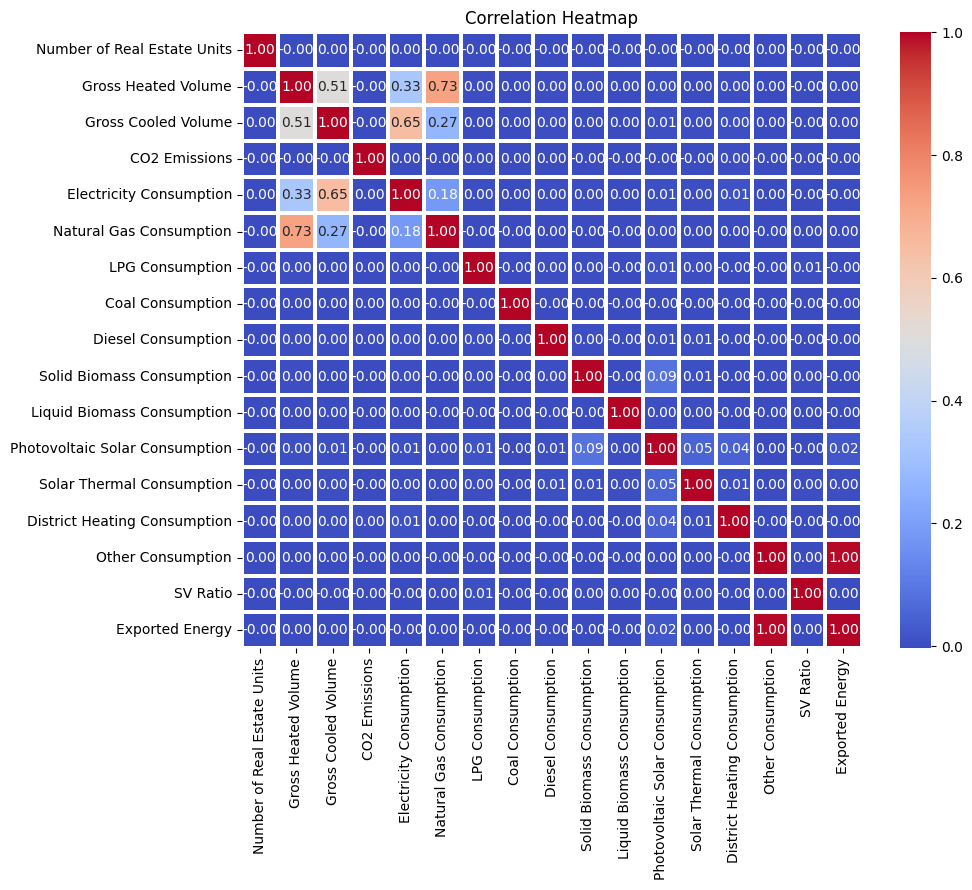

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_data = new_data[numeric_variables_names]
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,cmap="coolwarm",fmt=".2f", linewidths=1.5)
plt.title('Correlation Heatmap')
plt.show()

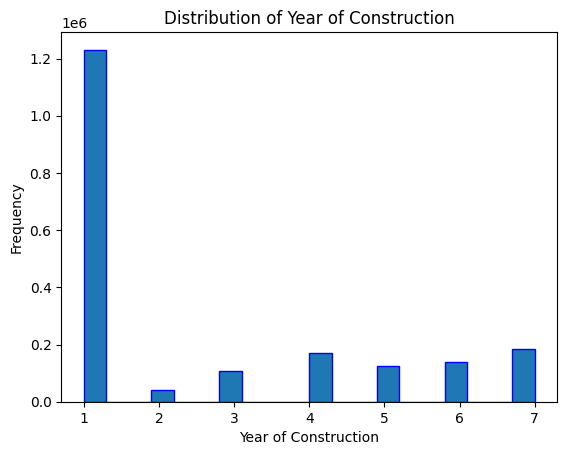

In [43]:
plt.hist(new_data["Year of Construction"],bins = 20, edgecolor = "blue")
plt.title("Distribution of Year of Construction")
plt.xlabel("Year of Construction")
plt.ylabel("Frequency")
plt.show()

In [44]:
new_data["Cadastral Municipality"] = new_data["Cadastral Municipality"].replace("MILANO","MILAN")

In [45]:
new_data["Cadastral Municipality"].value_counts(ascending=False)

Cadastral Municipality
MILAN        359523
BRESCIA       46094
BERGAMO       30597
MONZA         25309
PAVIA         20653
              ...  
MACCAGNO          1
GENZONE           1
MENAROLA          1
GRAVEDONA         1
CORNALE           1
Name: count, Length: 1562, dtype: int64

In [46]:
frequenza_comuni = new_data["Cadastral Municipality"].value_counts()
new_data["Cadastral Municipality"] = new_data["Cadastral Municipality"].map(frequenza_comuni)

In [47]:
len(new_data["Cadastral Municipality"].unique())

1030

In [48]:
comuni_molto_frequenti = new_data[new_data["Cadastral Municipality"]>3126]
comuni_molto_frequenti

,Residential,Cadastral Municipality,Public Use,DPR Classification,Number of Real Estate Units,Gross Heated Volume,Gross Cooled Volume,Summer Air Conditioning,Mechanical Ventilation,Hot Sanitary Water Production,...,Intervention Type 3,Intervention Type 4,Intervention Type 5,Intervention Type 6,Intervention Type 7,SV Ratio,Exported Energy,Certificate Title,Certificate Order,Qualified Technician
0,True,359523,False,E.1(1),12,455.55,455.55,True,True,True,...,NaN,NaN,NaN,Fonti rinnovabili,NaN,0.2522,0.00,Bachelor's Degree in Engineering,Order of Engineers,True
1,True,4070,False,E.1(1),28,328.48,328.48,True,False,True,...,NaN,NaN,NaN,NaN,NaN,0.3421,108.82,Master's Degree in Architecture,Order of Architects,True
2,True,4350,False,E.1(1),125,194.70,0.00,False,False,True,...,NaN,NaN,Altri impianti,NaN,Cumulativo,0.3296,0.00,Master's Degree in Architecture,Order of Architects,True
3,True,8479,False,E.1(1),1,318.10,318.10,True,False,True,...,NaN,NaN,NaN,NaN,Cumulativo,0.3766,0.00,Surveyor's Diploma,College of Surveyors,True
5,True,6441,False,E.1(1),1,196.99,0.00,False,False,True,...,NaN,NaN,NaN,NaN,Cumulativo,0.3606,0.00,Bachelor's Degree in Architecture,Order of Architects,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997645,True,12594,False,E.1(1),2,463.02,0.00,False,False,True,...,NaN,NaN,NaN,NaN,Cumulativo,0.6262,0.00,Industrial Expert Diploma or Technical Education,College of Industrial Experts,True
1997646,False,3906,False,E.8,1,16120.00,0.00,False,False,False,...,NaN,NaN,NaN,NaN,Cumulativo,0.3343,0.00,Surveyor's Diploma,College of Surveyors,True
1997647,True,12594,False,E.1(1),1,354.88,354.88,True,False,True,...,NaN,NaN,NaN,NaN,NaN,0.3231,0.00,Surveyor's Diploma,College of Surveyors,True
1997648,True,359523,False,E.1(1),1,207.02,0.00,False,False,True,...,NaN,NaN,NaN,NaN,Cumulativo,0.3350,0.00,Bachelor's Degree in Architecture,Order of Architects,True


In [49]:
len(comuni_molto_frequenti["Cadastral Municipality"].unique())

95

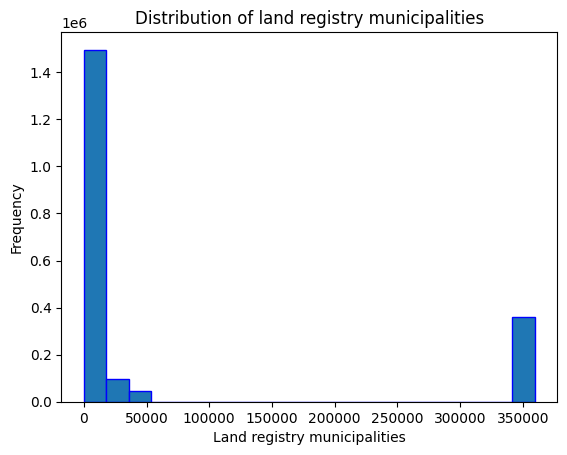

In [50]:
plt.hist(new_data["Cadastral Municipality"],bins = 20, edgecolor = "blue")
plt.title("Distribution of land registry municipalities")
plt.xlabel("Land registry municipalities")
plt.ylabel("Frequency")
plt.show()

In [51]:
new_data["Cadastral Municipality"].value_counts()

Cadastral Municipality
359523    359523
46094      46094
30597      30597
25309      25309
20653      20653
           ...  
10            10
2              8
7              7
1              5
3              3
Name: count, Length: 1030, dtype: int64

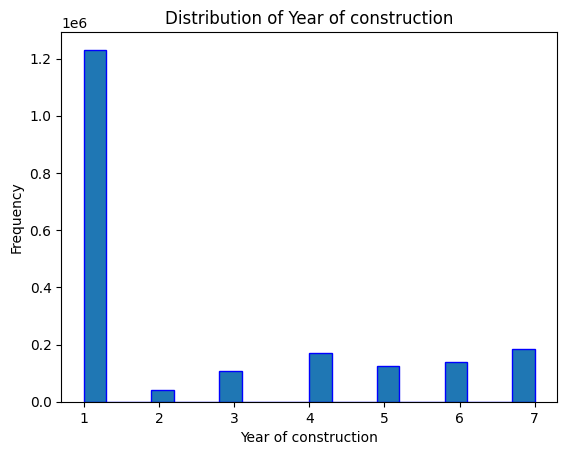

In [52]:
plt.hist(new_data["Year of Construction"],bins = 20, edgecolor = "blue")
plt.title("Distribution of Year of construction")
plt.xlabel("Year of construction")
plt.ylabel("Frequency")
plt.show()

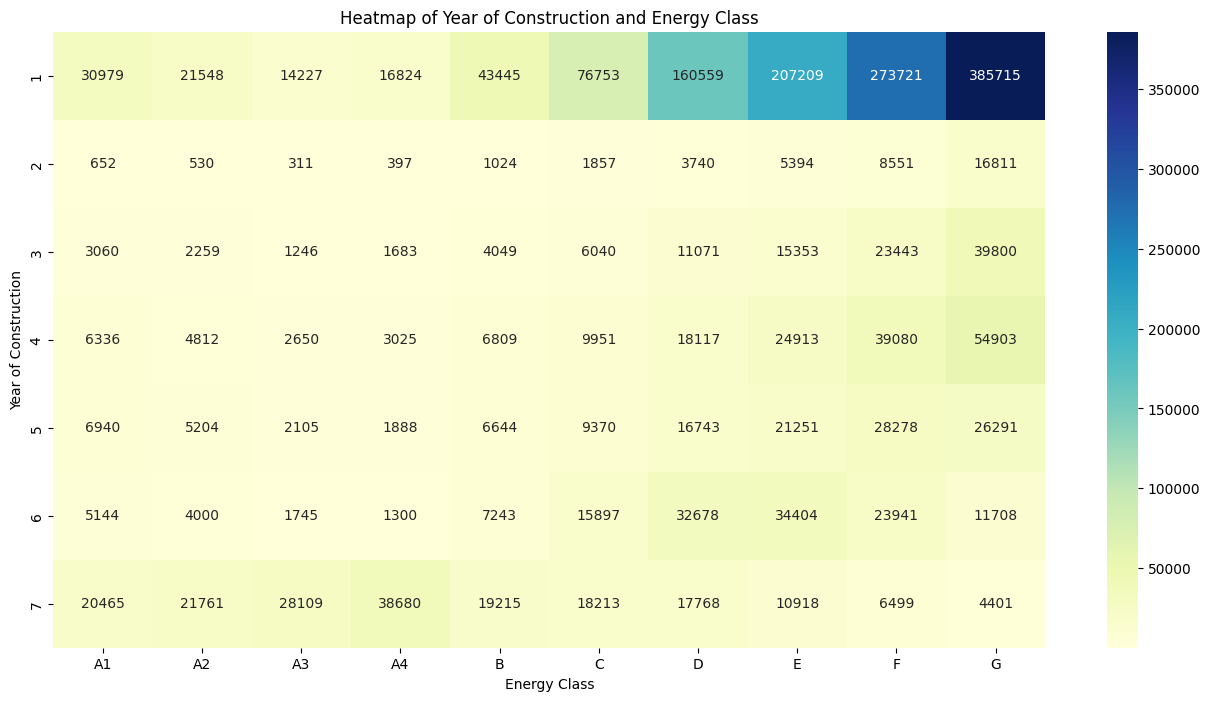

In [53]:
plt.figure(figsize=(16,8))
pivot_table = pd.crosstab(new_data['Year of Construction'], new_data['Energy Class'])

# Heatmap
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Year of Construction and Energy Class")
plt.show()

In [54]:
mappa_classe = {"A4":9,"A3":8,"A2":7,"A1":6,"B":5,"C":4,"D":3,"E":2,"F":1,"G":0}
new_data["Energy Class"] = new_data["Energy Class"].map(mappa_classe)

**Voti green**

In [55]:
voti_green = new_data[["Cadastral Municipality","Energy Class"]]
voti_green = voti_green[voti_green["Energy Class"]>5]
voti_green = voti_green.groupby("Cadastral Municipality").count().sort_values(by="Energy Class",ascending=False)
voti_green

,Energy Class
Cadastral Municipality,
359523,34947
46094,11337
30597,4182
25309,2926
7663,1737
...,...
46,1
64,1
15,1


In [56]:
comuni_totale = new_data[["Cadastral Municipality","Energy Class"]]
comuni_totale = comuni_totale.groupby("Cadastral Municipality").count().sort_values(by="Energy Class",ascending=False)
comuni_totale

,Energy Class
Cadastral Municipality,
359523,359523
46094,46094
30597,30597
25309,25309
20653,20653
...,...
10,10
2,8
7,7


In [57]:
merge_comuni = pd.merge(comuni_totale,voti_green, on="Cadastral Municipality")
merge_comuni["PROPORTION"] = merge_comuni["Energy Class_y"]/merge_comuni["Energy Class_x"]
voti_comuni_green = merge_comuni[["PROPORTION"]]
voti_comuni_green.sort_values(by="PROPORTION", ascending=False).head(10)

,PROPORTION
Cadastral Municipality,
76,0.407895
2124,0.400188
301,0.348837
648,0.347222
132,0.344697
866,0.329099
1431,0.327044
1051,0.320647
1917,0.314032


**Voti orange**

In [58]:
#creating dataframe only for orage class
voti_orange = new_data[new_data["Energy Class"].isin([3,4,5])]
voti_orange = voti_orange[["Cadastral Municipality","Energy Class"]]
voti_orange = voti_orange.groupby("Cadastral Municipality").count().sort_values(by="Energy Class",ascending=False)

#considering all the classes
voti_orange_totale = new_data[["Cadastral Municipality","Energy Class"]]
voti_orange_totale = voti_orange_totale.groupby("Cadastral Municipality").count().sort_values(by="Energy Class",ascending=False)

merge_orange = pd.merge(voti_orange_totale,voti_orange, on="Cadastral Municipality")
merge_orange["PROPORTION"] = merge_orange["Energy Class_y"]/merge_orange["Energy Class_x"]
merge_orange = merge_orange[["PROPORTION"]]
merge_orange.sort_values(by="PROPORTION", ascending=False).head(10)

,PROPORTION
Cadastral Municipality,
3,0.666667
578,0.482699
694,0.432277
4132,0.428364
240,0.425000
760,0.403947
2404,0.398918
279,0.394265
703,0.388336


**Voti red**

In [59]:
#creating dataset for red classes
voti_red = new_data[["Cadastral Municipality","Energy Class"]]
voti_red = voti_red[voti_red["Energy Class"]<3]
comuni_voti_red = voti_red.groupby("Cadastral Municipality").count().sort_values(by ="Energy Class",ascending=False)
comuni_voti_red
#considering all the classes
voti_red_totale = new_data[["Cadastral Municipality","Energy Class"]]
voti_red_totale = voti_red_totale.groupby("Cadastral Municipality").count().sort_values(by="Energy Class",ascending=False)

#computing proportion
merge_red = pd.merge(comuni_voti_red, voti_red_totale, on="Cadastral Municipality")
merge_red["PROPORTION"] = merge_red["Energy Class_x"]/merge_red["Energy Class_y"]
merge_red = merge_red[["PROPORTION"]]
merge_red.sort_values(by="PROPORTION", ascending=False).head(10)

,PROPORTION
Cadastral Municipality,
2,1.000000
7,1.000000
184,0.972826
56,0.946429
130,0.923077
25,0.920000
99,0.919192
52,0.913462
11,0.909091


In [60]:
new_data["Certificate Title"].value_counts()

Certificate Title
Surveyor's Diploma                                                                         881289
Master's Degree in Engineering                                                             320453
Bachelor's Degree in Architecture                                                          261108
Master's Degree in Architecture                                                            200424
Bachelor's Degree in Engineering                                                           165585
Industrial Expert Diploma or Technical Education                                           150506
Master's Degree in Chemistry                                                                 3961
Diploma di laurea in scienze e tecniche dell''edilizia                                       3699
Master's Degree in Territorial and Urban Planning                                            2925
Master's Degree in Agricultural Sciences and Technologies                                    2807
Ma

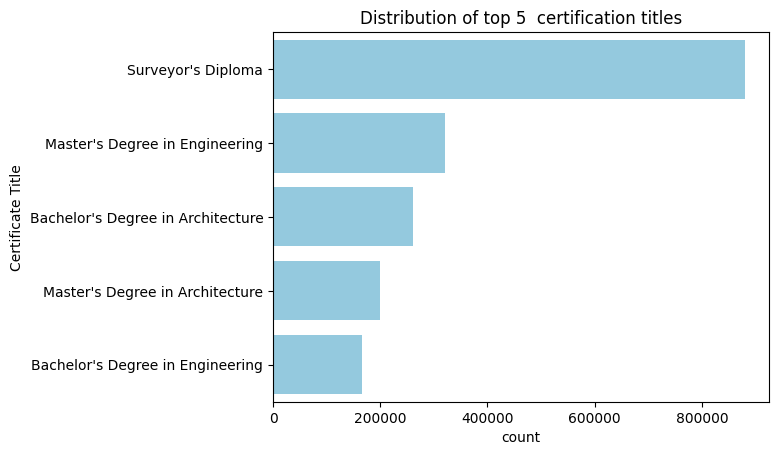

In [61]:
titles_certifications_counts = new_data["Certificate Title"].value_counts()
top_5_titles = titles_certifications_counts.head(5).index
df_top_10_titles = new_data[new_data["Certificate Title"].isin(top_5_titles)]
sns.countplot(y="Certificate Title", data = df_top_10_titles, color ="skyblue", order=titles_certifications_counts.head(5).index)
plt.title("Distribution of top 5  certification titles")
plt.show()

In [62]:
new_data["Certificate Order"].value_counts()

Certificate Order
College of Surveyors                             777227
Order of Engineers                               431292
Order of Architects                              406188
College of Industrial Experts                    139588
Other                                             95353
Order of Chemists                                  3557
Order of Agronomists                               2652
College of Agricultural Experts                    1966
Italian Association of Environmental Sciences       475
Name: count, dtype: int64

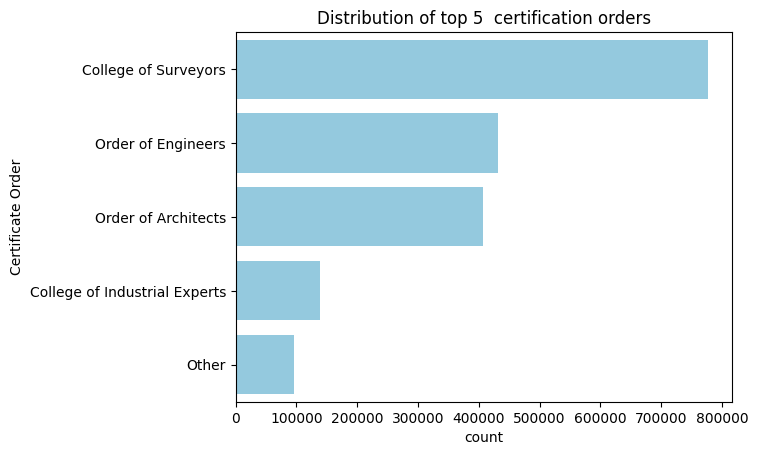

In [63]:
order_counts = new_data["Certificate Order"].value_counts()
top_5_orders= order_counts.head(5).index
df_top_5_orders = new_data[new_data["Certificate Order"].isin(top_5_orders)]
sns.countplot(y="Certificate Order", data = df_top_5_orders, color ="skyblue", order=order_counts.head(5).index)
plt.title("Distribution of top 5  certification orders")
plt.show()

In [64]:
new_data["Energy Class"].value_counts()

Energy Class
0    539629
1    403513
2    319442
3    260676
4    138081
5     88429
6     73576
9     63797
7     60114
8     50393
Name: count, dtype: int64

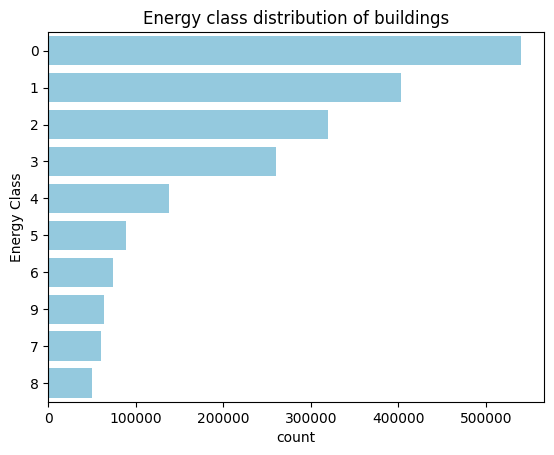

In [65]:
class_order = new_data["Energy Class"].value_counts().index


sns.countplot(y="Energy Class", data = new_data,color="skyblue", order=class_order)
plt.title("Energy class distribution of buildings")
plt.show()

In [66]:
nan_counts = data.isna().sum()

## FEATURE ENGINEERING

### Outliers

In [67]:
numeric_variables_names

['Number of Real Estate Units',
 'Gross Heated Volume',
 'Gross Cooled Volume',
 'CO2 Emissions',
 'Electricity Consumption',
 'Natural Gas Consumption',
 'LPG Consumption',
 'Coal Consumption',
 'Diesel Consumption',
 'Solid Biomass Consumption',
 'Liquid Biomass Consumption',
 'Photovoltaic Solar Consumption',
 'Solar Thermal Consumption',
 'District Heating Consumption',
 'Other Consumption',
 'SV Ratio',
 'Exported Energy']

In [68]:
def count_extreme_outliers(column): 
    boundaries = []
    for col in column:
        Q1 = new_data[col].quantile(0.25)
        Q3 = new_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_boundary = new_data[col].quantile(0.25) - (IQR * 3)
        upper_boundary = new_data[col].quantile(0.75) + (IQR * 3)
        count_outliers_above = (new_data[col] > upper_boundary).sum()
        count_outliers_below = (new_data[col] < lower_boundary).sum()

            # Append results
        boundaries.append({
                'Column': col,
                'Lower Boundary': lower_boundary,
                'Upper Boundary': upper_boundary,
                'Outliers Above': count_outliers_above,
                'Outliers Below': count_outliers_below,
                'Total Outliers': count_outliers_above + count_outliers_below
            })
    
    # Convert the list of dictionaries to a DataFrame
    boundaries_df = pd.DataFrame(boundaries)
    
    return boundaries_df
        
boundaries_df = count_extreme_outliers(numeric_variables_names)
boundaries_df

,Column,Lower Boundary,Upper Boundary,Outliers Above,Outliers Below,Total Outliers
0,Number of Real Estate Units,-41.0000,57.0000,103439,0,103439
1,Gross Heated Volume,-432.8000,1070.1000,114930,0,114930
2,Gross Cooled Volume,-596.2800,795.0400,60900,0,60900
3,CO2 Emissions,-88.9400,175.3100,9300,0,9300
4,Electricity Consumption,-4595.8125,6127.7500,180990,0,180990
5,Natural Gas Consumption,-4461.3600,6972.8600,78239,0,78239
6,LPG Consumption,0.0000,0.0000,18341,0,18341
7,Coal Consumption,0.0000,0.0000,13,0,13
8,Diesel Consumption,0.0000,0.0000,35769,0,35769
9,Solid Biomass Consumption,0.0000,0.0000,31932,0,31932


In [69]:
new_data["Coal Consumption"].value_counts(ascending=False)

Coal Consumption
0.0        1949780
1847.0           2
349.0            1
3562.0           1
1047.0           1
6814.0           1
2223.0           1
1679.0           1
13777.0          1
823.0            1
388.0            1
2147.0           1
1784.0           1
Name: count, dtype: int64

In [70]:
from scipy.stats import iqr
Q1 = new_data["CO2 Emissions"].quantile(0.25)  # 25th percentile
Q3 = new_data["CO2 Emissions"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1
lower_boundary = new_data["CO2 Emissions"].quantile(0.25) - (IQR * 3)
upper_boundary = new_data["CO2 Emissions"].quantile(0.75) + (IQR * 3)
print("lower boundary: ", lower_boundary, "upper boundary: ", upper_boundary)

lower boundary:  -88.94 upper boundary:  175.31


In [71]:
count_outliers = new_data[new_data["CO2 Emissions"]>upper_boundary].count()
count_outliers[1]

C:\Users\Alberto\AppData\Local\Temp\ipykernel_13156\1785798643.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_outliers[1]


9300

In [72]:
new_data[new_data["CO2 Emissions"]> upper_boundary].count()

Residential                       9300
Cadastral Municipality            9300
Public Use                        9300
DPR Classification                9300
Number of Real Estate Units       9300
Gross Heated Volume               9300
Gross Cooled Volume               9300
Summer Air Conditioning           9300
Mechanical Ventilation            9300
Hot Sanitary Water Production     9300
Lighting                          9300
Year of Construction              9300
Transport of People and Goods     9300
Nearly Zero Energy Building       9300
Energy Class                      9300
CO2 Emissions                     9300
Electricity Consumption           9300
Natural Gas Consumption           9300
LPG Consumption                   8876
Coal Consumption                  8871
Diesel Consumption                8876
Solid Biomass Consumption         8871
Liquid Biomass Consumption        8871
Photovoltaic Solar Consumption    9300
Solar Thermal Consumption         8871
District Heating Consumpt

In [73]:
new_data.columns

Index(['Residential', 'Cadastral Municipality', 'Public Use',
       'DPR Classification', 'Number of Real Estate Units',
       'Gross Heated Volume', 'Gross Cooled Volume', 'Summer Air Conditioning',
       'Mechanical Ventilation', 'Hot Sanitary Water Production', 'Lighting',
       'Year of Construction', 'Transport of People and Goods',
       'Nearly Zero Energy Building', 'Energy Class', 'CO2 Emissions',
       'Electricity Consumption', 'Natural Gas Consumption', 'LPG Consumption',
       'Coal Consumption', 'Diesel Consumption', 'Solid Biomass Consumption',
       'Liquid Biomass Consumption', 'Photovoltaic Solar Consumption',
       'Solar Thermal Consumption', 'District Heating Consumption',
       'Other Consumption', 'Intervention Type 1', 'Intervention Type 2',
       'Intervention Type 3', 'Intervention Type 4', 'Intervention Type 5',
       'Intervention Type 6', 'Intervention Type 7', 'SV Ratio',
       'Exported Energy', 'Certificate Title', 'Certificate Order',
     

In [74]:

def replace_extreme_outliers(df, columns): 
    for col in columns:
        # Calculate Q1, Q3, IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper boundaries (using 3 times the IQR as you have specified)
        lower_boundary = Q1 - (IQR * 3)
        upper_boundary = Q3 + (IQR * 3)
        
        # Replace values below the lower boundary with the lower boundary, and above the upper boundary with the upper boundary
        df[col] = df[col].apply(lambda x: min(max(x, lower_boundary), upper_boundary))
        
    return df

### Managing Nan

In [75]:
numeric_variables_with_nan = ['LPG Consumption', 'Natural Gas Consumption', 'Coal Consumption',
       'Diesel Consumption', 'Solid Biomass Consumption',
       'Liquid Biomass Consumption', 'Solar Thermal Consumption',
         'Other Consumption', 'SV Ratio']

In [76]:
n_naaaan = new_data.isna().sum()
col_naaaan = n_naaaan[n_naaaan>0].index
col_naaaan

Index(['Natural Gas Consumption', 'LPG Consumption', 'Coal Consumption',
       'Diesel Consumption', 'Solid Biomass Consumption',
       'Liquid Biomass Consumption', 'Solar Thermal Consumption',
       'Other Consumption', 'Intervention Type 1', 'Intervention Type 2',
       'Intervention Type 3', 'Intervention Type 4', 'Intervention Type 5',
       'Intervention Type 6', 'Intervention Type 7', 'SV Ratio',
       'Certificate Order', 'Qualified Technician'],
      dtype='object')

In [77]:
new_data['Intervention Type 7'].value_counts()

Intervention Type 7
Cumulativo    880529
Name: count, dtype: int64

In [78]:
intervention_with_nan = ['Intervention Type 1','Intervention Type 2','Intervention Type 3',
                         'Intervention Type 4', 'Intervention Type 5', 'Intervention Type 6',
                                  'Intervention Type 7']
new_data[intervention_with_nan] = new_data[intervention_with_nan].notna().astype(int)
new_data[intervention_with_nan] = new_data[intervention_with_nan].fillna(0)

In [79]:
new_data["Energy Class"].value_counts()

Energy Class
0    539629
1    403513
2    319442
3    260676
4    138081
5     88429
6     73576
9     63797
7     60114
8     50393
Name: count, dtype: int64

In [80]:
new_data["Certificate Order"].value_counts()

Certificate Order
College of Surveyors                             777227
Order of Engineers                               431292
Order of Architects                              406188
College of Industrial Experts                    139588
Other                                             95353
Order of Chemists                                  3557
Order of Agronomists                               2652
College of Agricultural Experts                    1966
Italian Association of Environmental Sciences       475
Name: count, dtype: int64

In [81]:
new_data["Certificate Order"].isna().sum()

139352

In [82]:
moda_ordinecert = new_data["Certificate Order"].mode()
moda_ordinecert

0    College of Surveyors
Name: Certificate Order, dtype: object

In [83]:
new_data["Qualified Technician"].value_counts()

Qualified Technician
True    1997509
Name: count, dtype: int64

In [84]:
new_data["Certificate Order"] = new_data["Certificate Order"].fillna("College of Surveyors")

In [85]:
new_data["Qualified Technician"] = new_data["Qualified Technician"].fillna(True)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_13156\161047034.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data["Qualified Technician"] = new_data["Qualified Technician"].fillna(True)


In [86]:
new_data.isna().sum().sort_values(ascending=False)

Coal Consumption                  47857
Solid Biomass Consumption         47857
Liquid Biomass Consumption        47857
Solar Thermal Consumption         47857
Other Consumption                 47857
LPG Consumption                   47300
Diesel Consumption                47300
SV Ratio                              2
Natural Gas Consumption               1
Intervention Type 6                   0
Intervention Type 5                   0
Intervention Type 4                   0
Intervention Type 7                   0
Intervention Type 2                   0
Intervention Type 1                   0
District Heating Consumption          0
Exported Energy                       0
Photovoltaic Solar Consumption        0
Certificate Title                     0
Certificate Order                     0
Intervention Type 3                   0
Residential                           0
Cadastral Municipality                0
Mechanical Ventilation                0
Public Use                            0


In [87]:
new_data.drop("Qualified Technician", axis = 1, inplace=True)

In [88]:
n_naaaan = new_data.isna().sum()
col_naaaan = n_naaaan[n_naaaan>0].index
col_naaaan

Index(['Natural Gas Consumption', 'LPG Consumption', 'Coal Consumption',
       'Diesel Consumption', 'Solid Biomass Consumption',
       'Liquid Biomass Consumption', 'Solar Thermal Consumption',
       'Other Consumption', 'SV Ratio'],
      dtype='object')

In [89]:
new_data[col_naaaan] = new_data[col_naaaan].fillna(0)

### Handling Categorical Variables

In [90]:
new_data.drop("Cadastral Municipality", axis =1, inplace =True)

In [91]:
new_data.dtypes

Residential                          bool
Public Use                           bool
DPR Classification                 object
Number of Real Estate Units         int64
Gross Heated Volume               float64
Gross Cooled Volume               float64
Summer Air Conditioning              bool
Mechanical Ventilation               bool
Hot Sanitary Water Production        bool
Lighting                             bool
Year of Construction                int32
Transport of People and Goods        bool
Nearly Zero Energy Building          bool
Energy Class                        int64
CO2 Emissions                     float64
Electricity Consumption           float64
Natural Gas Consumption           float64
LPG Consumption                   float64
Coal Consumption                  float64
Diesel Consumption                float64
Solid Biomass Consumption         float64
Liquid Biomass Consumption        float64
Photovoltaic Solar Consumption      int64
Solar Thermal Consumption         

In [92]:
new_data.head()

,Residential,Public Use,DPR Classification,Number of Real Estate Units,Gross Heated Volume,Gross Cooled Volume,Summer Air Conditioning,Mechanical Ventilation,Hot Sanitary Water Production,Lighting,...,Intervention Type 2,Intervention Type 3,Intervention Type 4,Intervention Type 5,Intervention Type 6,Intervention Type 7,SV Ratio,Exported Energy,Certificate Title,Certificate Order
0,True,False,E.1(1),12,455.55,455.55,True,True,True,False,...,0,0,0,0,1,0,0.2522,0.00,Bachelor's Degree in Engineering,Order of Engineers
1,True,False,E.1(1),28,328.48,328.48,True,False,True,False,...,0,0,0,0,0,0,0.3421,108.82,Master's Degree in Architecture,Order of Architects
2,True,False,E.1(1),125,194.70,0.00,False,False,True,False,...,0,0,0,1,0,1,0.3296,0.00,Master's Degree in Architecture,Order of Architects
3,True,False,E.1(1),1,318.10,318.10,True,False,True,False,...,0,0,0,0,0,1,0.3766,0.00,Surveyor's Diploma,College of Surveyors
4,True,False,E.1(1),83,343.63,0.00,False,False,True,False,...,0,0,0,0,0,0,0.3155,0.00,Master's Degree in Engineering,Order of Engineers


In [93]:
new_data["Mechanical Ventilation"].value_counts()

Mechanical Ventilation
False    1885520
True      112130
Name: count, dtype: int64

In [94]:
new_data["Energy Class"].value_counts()

Energy Class
0    539629
1    403513
2    319442
3    260676
4    138081
5     88429
6     73576
9     63797
7     60114
8     50393
Name: count, dtype: int64

In [95]:
new_data["Energy Class"].value_counts()

Energy Class
0    539629
1    403513
2    319442
3    260676
4    138081
5     88429
6     73576
9     63797
7     60114
8     50393
Name: count, dtype: int64

In [96]:
#counts_title = new_data["Certificate Title"].value_counts()
#filtered_values = counts_title[counts_title> 80].index
#new_data = new_data[new_data['Certificate Title'].isin(filtered_values)]
#a = new_data[new_data['Certificate Title'].isin(filtered_values)]
#a["Energy Class"].value_counts()
#filtered_values

In [97]:
dummy_titles = pd.get_dummies(new_data["Certificate Title"])
dummy_titles

,Advanced Technician Diploma - Energy Efficiency Area,Agricultural Expert Diploma,Agrotecnico,Bachelor's Degree in Agricultural and Forestry Sciences and Technologies,Bachelor's Degree in Architecture,Bachelor's Degree in Engineering,Bachelor's Degree in Geological Sciences,"Bachelor's Degree in Territorial, Urban, Landscape, and Environmental Planning Sciences",Diploma di laurea in scienze e tecniche dell''edilizia,Diploma di laurea in scienze e tecnologie per l''ambiente e la natura,...,Master's Degree in Chemistry,Master's Degree in Engineering,Master's Degree in Environmental Sciences,Master's Degree in Forestry and Environmental Sciences and Technologies,Master's Degree in Geological Sciences and Technologies,Master's Degree in Industrial Chemistry Sciences and Technologies,Master's Degree in Natural Sciences,Master's Degree in Physics,Master's Degree in Territorial and Urban Planning,Surveyor's Diploma
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997645,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1997647,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1997648,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [98]:
final_data = pd.concat([new_data.drop(columns=["Certificate Title"]),dummy_titles], axis = 1)

In [99]:
new_data["Energy Class"].isna().sum()

0

In [100]:
final_data.head(6)

,Residential,Public Use,DPR Classification,Number of Real Estate Units,Gross Heated Volume,Gross Cooled Volume,Summer Air Conditioning,Mechanical Ventilation,Hot Sanitary Water Production,Lighting,...,Master's Degree in Chemistry,Master's Degree in Engineering,Master's Degree in Environmental Sciences,Master's Degree in Forestry and Environmental Sciences and Technologies,Master's Degree in Geological Sciences and Technologies,Master's Degree in Industrial Chemistry Sciences and Technologies,Master's Degree in Natural Sciences,Master's Degree in Physics,Master's Degree in Territorial and Urban Planning,Surveyor's Diploma
0,True,False,E.1(1),12,455.55,455.55,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,E.1(1),28,328.48,328.48,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,E.1(1),125,194.70,0.00,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,E.1(1),1,318.10,318.10,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,E.1(1),83,343.63,0.00,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
5,True,False,E.1(1),1,196.99,0.00,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
final_data["Energy Class"].isna().sum()

0

In [102]:
final_data["DPR Classification"].value_counts()

DPR Classification
E.1(1)     1688790
E.5          94955
E.8          82806
E.2          75928
E.1(2)       30031
E.4(3)       11960
E.7           3991
E.1(3)        3109
E.6(2)        1993
E.3           1650
E.6(3)         836
E.4(1)         819
E.4(2)         630
E.6(1)         151
E.1 (1)          1
Name: count, dtype: int64

In [103]:
mapping_dict = {
    'E.1 (1)': 1, 'E.1(1)': 1,
    'E.5': 2,
    'E.8': 3,
    'E.2': 4,
    'E.1 (2)': 5, 'E.1(2)': 5,
    'E.4 (3)': 6, 'E.4(3)': 6,
    'E.7': 7,
    'E.1 (3)': 8, 'E.1(3)': 8,
    'E.3': 9,
    'E.6 (2)': 10, 'E.6(2)': 10,
    'E.6 (3)': 11, 'E.6(3)': 11,
    'E.4 (1)': 12, 'E.4(1)': 12,
    'E.4 (2)': 13, 'E.4(2)': 13,
    'E.6 (1)': 14, 'E.6(1)': 14
}

final_data['DPR Classification'] = final_data['DPR Classification'].map(mapping_dict)

In [104]:
final_data.head(3)

,Residential,Public Use,DPR Classification,Number of Real Estate Units,Gross Heated Volume,Gross Cooled Volume,Summer Air Conditioning,Mechanical Ventilation,Hot Sanitary Water Production,Lighting,...,Master's Degree in Chemistry,Master's Degree in Engineering,Master's Degree in Environmental Sciences,Master's Degree in Forestry and Environmental Sciences and Technologies,Master's Degree in Geological Sciences and Technologies,Master's Degree in Industrial Chemistry Sciences and Technologies,Master's Degree in Natural Sciences,Master's Degree in Physics,Master's Degree in Territorial and Urban Planning,Surveyor's Diploma
0,True,False,1,12,455.55,455.55,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,1,28,328.48,328.48,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,1,125,194.70,0.00,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [105]:
final_data["Certificate Order"].value_counts()

Certificate Order
College of Surveyors                             916579
Order of Engineers                               431292
Order of Architects                              406188
College of Industrial Experts                    139588
Other                                             95353
Order of Chemists                                  3557
Order of Agronomists                               2652
College of Agricultural Experts                    1966
Italian Association of Environmental Sciences       475
Name: count, dtype: int64

In [106]:
ordine_dummy = pd.get_dummies(final_data["Certificate Order"])
final_data = pd.concat([final_data.drop(columns=["Certificate Order"]),ordine_dummy], axis=1)
final_data.head(3)

,Residential,Public Use,DPR Classification,Number of Real Estate Units,Gross Heated Volume,Gross Cooled Volume,Summer Air Conditioning,Mechanical Ventilation,Hot Sanitary Water Production,Lighting,...,Surveyor's Diploma,College of Agricultural Experts,College of Industrial Experts,College of Surveyors,Italian Association of Environmental Sciences,Order of Agronomists,Order of Architects,Order of Chemists,Order of Engineers,Other
0,True,False,1,12,455.55,455.55,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False
1,True,False,1,28,328.48,328.48,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,True,False,1,125,194.70,0.00,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [107]:
boolean_variables = final_data.select_dtypes(include="bool")
boolean_variables.head(2)

,Residential,Public Use,Summer Air Conditioning,Mechanical Ventilation,Hot Sanitary Water Production,Lighting,Transport of People and Goods,Nearly Zero Energy Building,Advanced Technician Diploma - Energy Efficiency Area,Agricultural Expert Diploma,...,Surveyor's Diploma,College of Agricultural Experts,College of Industrial Experts,College of Surveyors,Italian Association of Environmental Sciences,Order of Agronomists,Order of Architects,Order of Chemists,Order of Engineers,Other
0,True,False,True,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,True,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [108]:
boolean_variables.columns

Index(['Residential', 'Public Use', 'Summer Air Conditioning',
       'Mechanical Ventilation', 'Hot Sanitary Water Production', 'Lighting',
       'Transport of People and Goods', 'Nearly Zero Energy Building',
       'Advanced Technician Diploma - Energy Efficiency Area',
       'Agricultural Expert Diploma', 'Agrotecnico',
       'Bachelor's Degree in Agricultural and Forestry Sciences and Technologies',
       'Bachelor's Degree in Architecture', 'Bachelor's Degree in Engineering',
       'Bachelor's Degree in Geological Sciences',
       'Bachelor's Degree in Territorial, Urban, Landscape, and Environmental Planning Sciences',
       'Diploma di laurea in scienze e tecniche dell''edilizia',
       'Diploma di laurea in scienze e tecnologie per l''ambiente e la natura',
       'Industrial Expert Diploma or Technical Education',
       'Master's Degree in Agricultural Sciences and Technologies',
       'Master's Degree in Architecture', 'Master's Degree in Chemistry',
       'Master

In [109]:
for col in boolean_variables.columns:
    final_data[col] =final_data[col].map({True:1,False:0})

In [110]:
final_data.head(6)

,Residential,Public Use,DPR Classification,Number of Real Estate Units,Gross Heated Volume,Gross Cooled Volume,Summer Air Conditioning,Mechanical Ventilation,Hot Sanitary Water Production,Lighting,...,Surveyor's Diploma,College of Agricultural Experts,College of Industrial Experts,College of Surveyors,Italian Association of Environmental Sciences,Order of Agronomists,Order of Architects,Order of Chemists,Order of Engineers,Other
0,1,0,1,12,455.55,455.55,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,28,328.48,328.48,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,125,194.70,0.00,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,1,318.10,318.10,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,1,0,1,83,343.63,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,1,0,1,1,196.99,0.00,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [111]:
#anno_costruzione_map = new_data["ANNO_COSTRUZIONE"].mean()
#new_data["ANNO_COSTRUZIONE"] = new_data["ANNO_COSTRUZIONE"].map(anno_costruzione_map)
#anno_costruzione_map

In [112]:
#frequenza_ordinecert = new_data["ORDINE_CERT"].value_counts()
#new_data["ORDINE_CERT"] = new_data["ORDINE_CERT"].map(frequenza_ordinecert)

### Manage numerical variables

In [113]:
final_data["Electricity Consumption"] = final_data["Electricity Consumption"].astype(float)

In [114]:
final_data["Nearly Zero Energy Building"]

0          1
1          0
2          0
3          0
4          0
          ..
1997645    0
1997646    0
1997647    0
1997648    0
1997649    0
Name: Nearly Zero Energy Building, Length: 1997650, dtype: int64

## SHRINKAGE METHODES

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = final_data["Energy Class"]
#y = le.fit_transform(y)

In [117]:
#y.isna().sum()

In [118]:
X =final_data.drop("Energy Class",axis = 1)
X.head()

,Residential,Public Use,DPR Classification,Number of Real Estate Units,Gross Heated Volume,Gross Cooled Volume,Summer Air Conditioning,Mechanical Ventilation,Hot Sanitary Water Production,Lighting,...,Surveyor's Diploma,College of Agricultural Experts,College of Industrial Experts,College of Surveyors,Italian Association of Environmental Sciences,Order of Agronomists,Order of Architects,Order of Chemists,Order of Engineers,Other
0,1,0,1,12,455.55,455.55,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,28,328.48,328.48,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,125,194.70,0.00,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,1,318.10,318.10,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,1,0,1,83,343.63,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [119]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

c:\Users\Alberto\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Residential,3.935672e+02
1,Public Use,1.030698e+00
2,DPR Classification,2.048723e+00
3,Number of Real Estate Units,1.000010e+00
4,Gross Heated Volume,2.709431e+00
...,...,...
61,Order of Agronomists,2.251800e+15
62,Order of Architects,inf
63,Order of Chemists,1.125900e+15
64,Order of Engineers,inf


In [120]:
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Print the resulting sorted DataFrame with features and their VIF values
print(vif_data_sorted)

                                              Feature       VIF
65                                              Other       inf
52  Master's Degree in Industrial Chemistry Scienc...       inf
36                                        Agrotecnico       inf
39                   Bachelor's Degree in Engineering       inf
43  Diploma di laurea in scienze e tecnologie per ...       inf
..                                                ...       ...
32                                           SV Ratio  1.001126
20                         Liquid Biomass Consumption  1.000064
17                                   Coal Consumption  1.000028
3                         Number of Real Estate Units  1.000010
13                                      CO2 Emissions  1.000009

[66 rows x 2 columns]


In [121]:
vif_data_sorted[0:35]

,Feature,VIF
65,Other,inf
52,Master's Degree in Industrial Chemistry Scienc...,inf
36,Agrotecnico,inf
39,Bachelor's Degree in Engineering,inf
43,Diploma di laurea in scienze e tecnologie per ...,inf
44,Industrial Expert Diploma or Technical Education,inf
46,Master's Degree in Architecture,inf
47,Master's Degree in Chemistry,inf
48,Master's Degree in Engineering,inf
51,Master's Degree in Geological Sciences and Tec...,inf


In [122]:
vif_data_sorted[35:]

,Feature,VIF
24,Other Consumption,106.738060
4,Gross Heated Volume,2.709431
15,Natural Gas Consumption,2.173583
5,Gross Cooled Volume,2.134398
2,DPR Classification,2.048723
14,Electricity Consumption,1.751409
25,Intervention Type 1,1.664415
31,Intervention Type 7,1.608165
26,Intervention Type 2,1.486107
8,Hot Sanitary Water Production,1.380286


In [123]:
X.drop(["Residential", "Exported Energy", "Other Consumption"], axis = 1, inplace=True)


In [124]:
a = X.dtypes == object
for key, val in a.items():
    if val == True:
        print("key:", key, val)


In [125]:
final_data["Energy Class"].isna().sum()

0

In [126]:
final_data.isna().sum()

Residential                    0
Public Use                     0
DPR Classification             0
Number of Real Estate Units    0
Gross Heated Volume            0
                              ..
Order of Agronomists           0
Order of Architects            0
Order of Chemists              0
Order of Engineers             0
Other                          0
Length: 67, dtype: int64

In [127]:
y.isna().sum()

0

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [129]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [130]:
numeric_cols = X_train.select_dtypes(include=["float64","int64"]).columns
columns_to_standardize = numeric_cols.difference(boolean_variables.columns)
columns_to_standardize

Index(['CO2 Emissions', 'Coal Consumption', 'DPR Classification',
       'Diesel Consumption', 'District Heating Consumption',
       'Electricity Consumption', 'Gross Cooled Volume', 'Gross Heated Volume',
       'LPG Consumption', 'Liquid Biomass Consumption',
       'Natural Gas Consumption', 'Number of Real Estate Units',
       'Photovoltaic Solar Consumption', 'SV Ratio',
       'Solar Thermal Consumption', 'Solid Biomass Consumption'],
      dtype='object')

In [131]:
len(columns_to_standardize)

16

In [132]:
scaler = StandardScaler()
for col in columns_to_standardize:
    X_train[col]= scaler.fit_transform(X_train[[col]])


In [133]:
for col in columns_to_standardize:
    X_test[col]= scaler.fit_transform(X_test[[col]])

In [134]:
X_sample, _, y_sample, _ = train_test_split(
    X, y,
    train_size=400000,
    stratify=y,
    random_state=42
)

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_sample, y_sample,
    test_size=0.30,
    stratify=y_sample,  
    random_state=42
)

In [135]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegressionCV, LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [136]:
final_data.isna().sum().sort_values(ascending=False)

Residential                                                                 0
Master's Degree in Environmental Sciences                                   0
Agricultural Expert Diploma                                                 0
Agrotecnico                                                                 0
Bachelor's Degree in Agricultural and Forestry Sciences and Technologies    0
                                                                           ..
Intervention Type 3                                                         0
Intervention Type 4                                                         0
Intervention Type 5                                                         0
Intervention Type 6                                                         0
Other                                                                       0
Length: 67, dtype: int64

In [137]:
pd.set_option('display.max_colwidth', None)  # Disable truncating the column names
pd.set_option('display.width', None) 

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

cross_validator = StratifiedKFold(n_splits=5)


### **Lasso Regression**

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

cross_validator = StratifiedKFold(n_splits=5)



C_value = 10.0  

log_reg_10 = LogisticRegression(
    penalty='l1',  
    solver='saga',  
    C=C_value,  
    max_iter=10000,  
    random_state=42,
    multi_class='multinomial', 
    class_weight='balanced',
    n_jobs=-1  
)

log_reg_10.fit(X_train, y_train)

c:\Users\Alberto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10.0, class_weight='balanced', max_iter=10000,
                   multi_class='multinomial', n_jobs=-1, penalty='l1',
                   random_state=42, solver='saga')

In [140]:
nomi_colonne = list(X_train.columns)
coefficienti_lasso = log_reg_10.coef_[0]
table_lasso_coeff_10 = pd.DataFrame({
    "Variable":nomi_colonne,
    "Coefficient":coefficienti_lasso
})
intercept_lasso = pd.DataFrame({
    "Variable":["Intercept"],
    "Coefficient":[log_reg_10.intercept_[0]]
})

table_lasso_coeff_10 = pd.concat([table_lasso_coeff_10, intercept_lasso], ignore_index=True)
table_lasso_coeff_10[30:]

,Variable,Coefficient
30,SV Ratio,1.597247
31,Advanced Technician Diploma - Energy Efficiency Area,-0.177143
32,Agricultural Expert Diploma,-0.106516
33,Agrotecnico,0.000000
34,Bachelor's Degree in Agricultural and Forestry Sciences and Technologies,-0.007310
35,Bachelor's Degree in Architecture,0.429114
36,Bachelor's Degree in Engineering,0.024319
37,Bachelor's Degree in Geological Sciences,0.039052
38,"Bachelor's Degree in Territorial, Urban, Landscape, and Environmental Planning Sciences",-0.001082
39,Diploma di laurea in scienze e tecniche dell''edilizia,-0.102353


In [141]:
table_lasso_coeff_10[0:30]

,Variable,Coefficient
0,Public Use,-0.166572
1,DPR Classification,-0.043640
2,Number of Real Estate Units,-0.020985
3,Gross Heated Volume,-0.465700
4,Gross Cooled Volume,-0.520458
5,Summer Air Conditioning,-1.985588
6,Mechanical Ventilation,-1.822221
7,Hot Sanitary Water Production,-0.850418
8,Lighting,-0.926021
9,Year of Construction,-0.288146


In [142]:
from sklearn.metrics import roc_auc_score
y_pred_prob_log_10 = log_reg_10.predict_proba(X_test)

roc_auc_lasso_10 = roc_auc_score(y_test, y_pred_prob_log_10, average='macro', multi_class='ovr')

print(f"ROC AUC (Macro average): {roc_auc_lasso_10}")

ROC AUC (Macro average): 0.7821745440099552


In [143]:
y_pred_lasso_10 = log_reg_10.predict(X_test)
mse_lasso_10 = mse(y_test,y_pred_lasso_10)
mse_lasso_10

4.583959485729065

In [144]:
C_value = 0.1  
log_reg_01 = LogisticRegression(
    penalty='l1',  
    solver='saga',  # SAGA solver supports L1 regularization
    C=C_value,  
    max_iter=10000, 
    random_state=42,
    multi_class='multinomial',  # Multinomial logistic regression
    class_weight='balanced',
    n_jobs=-1  
)

log_reg_01.fit(X_train, y_train)

c:\Users\Alberto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,
                   multi_class='multinomial', n_jobs=-1, penalty='l1',
                   random_state=42, solver='saga')

In [145]:
nomi_colonne = list(X_train.columns)
coefficienti_lasso = log_reg_01.coef_[0]
table_lasso_coeff_01 = pd.DataFrame({
    "Variable":nomi_colonne,
    "Coefficient":coefficienti_lasso
})
intercept_lasso = pd.DataFrame({
    "Variable":["Intercept"],
    "Coefficient":[log_reg_01.intercept_[0]]
})

table_lasso_coeff_01 = pd.concat([table_lasso_coeff_01, intercept_lasso], ignore_index=True)
table_lasso_coeff_01[30:]

,Variable,Coefficient
30,SV Ratio,1.598846
31,Advanced Technician Diploma - Energy Efficiency Area,-0.137456
32,Agricultural Expert Diploma,-0.070722
33,Agrotecnico,0.000000
34,Bachelor's Degree in Agricultural and Forestry Sciences and Technologies,0.000000
35,Bachelor's Degree in Architecture,0.403216
36,Bachelor's Degree in Engineering,0.002579
37,Bachelor's Degree in Geological Sciences,0.000000
38,"Bachelor's Degree in Territorial, Urban, Landscape, and Environmental Planning Sciences",0.000000
39,Diploma di laurea in scienze e tecniche dell''edilizia,-0.085449


In [146]:
table_lasso_coeff_01[0:30]

,Variable,Coefficient
0,Public Use,-0.130870
1,DPR Classification,-0.044642
2,Number of Real Estate Units,0.000000
3,Gross Heated Volume,-0.441354
4,Gross Cooled Volume,-0.495173
5,Summer Air Conditioning,-2.001981
6,Mechanical Ventilation,-1.802390
7,Hot Sanitary Water Production,-0.840883
8,Lighting,-0.916984
9,Year of Construction,-0.296753


In [147]:
from sklearn.metrics import roc_auc_score
y_pred_prob_log_01 = log_reg_01.predict_proba(X_test)

roc_auc_lasso_01 = roc_auc_score(y_test, y_pred_prob_log_01, average='macro', multi_class='ovr')

print(f"ROC AUC (Macro average): {roc_auc_lasso_01}")

ROC AUC (Macro average): 0.7821116429444673


In [148]:
y_pred_lasso_01 = log_reg_01.predict(X_test)
mse_lasso_01 = mse(y_test,y_pred_lasso_01)
mse_lasso_01

4.580138329203481

In [149]:
C_value = 0.01  # Choose your desired value of C (can be adjusted)

# Define logistic regression with L1 regularization (lasso) and multinomial loss
log_reg_001 = LogisticRegression(
    penalty='l1',  # Lasso regularization (L1)
    solver='saga',  # SAGA solver supports L1 regularization
    C=C_value,  # Single value of C
    max_iter=10000,  # Allow higher iteration for convergence
    random_state=42,
    multi_class='multinomial',  # Multinomial logistic regression
    class_weight='balanced',
    n_jobs=-1  # Use all CPUs for cross-validation
)

# Fit the model directly without OneVsRestClassifier, since we are using multinomial
log_reg_001.fit(X_train, y_train)

c:\Users\Alberto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.01, class_weight='balanced', max_iter=10000,
                   multi_class='multinomial', n_jobs=-1, penalty='l1',
                   random_state=42, solver='saga')

In [150]:
nomi_colonne = list(X_train.columns)
coefficienti_lasso = log_reg_001.coef_[0]
table_lasso_coeff_001 = pd.DataFrame({
    "Variable":nomi_colonne,
    "Coefficient":coefficienti_lasso
})
intercept_lasso = pd.DataFrame({
    "Variable":["Intercept"],
    "Coefficient":[log_reg_001.intercept_[0]]
})

table_lasso_coeff_001 = pd.concat([table_lasso_coeff_001, intercept_lasso], ignore_index=True)
table_lasso_coeff_001[30:]

,Variable,Coefficient
30,SV Ratio,1.581962
31,Advanced Technician Diploma - Energy Efficiency Area,0.000000
32,Agricultural Expert Diploma,0.000000
33,Agrotecnico,0.000000
34,Bachelor's Degree in Agricultural and Forestry Sciences and Technologies,0.000000
35,Bachelor's Degree in Architecture,0.292899
36,Bachelor's Degree in Engineering,-0.003752
37,Bachelor's Degree in Geological Sciences,0.000000
38,"Bachelor's Degree in Territorial, Urban, Landscape, and Environmental Planning Sciences",0.000000
39,Diploma di laurea in scienze e tecniche dell''edilizia,0.000000


In [151]:
table_lasso_coeff_001[0:30]

,Variable,Coefficient
0,Public Use,0.000000
1,DPR Classification,-0.049114
2,Number of Real Estate Units,0.000000
3,Gross Heated Volume,-0.223610
4,Gross Cooled Volume,-0.273679
5,Summer Air Conditioning,-2.148747
6,Mechanical Ventilation,-1.633047
7,Hot Sanitary Water Production,-0.796326
8,Lighting,-0.854919
9,Year of Construction,-0.302359


In [152]:
from sklearn.metrics import roc_auc_score

y_pred_prob_log_001 = log_reg_001.predict_proba(X_test)

roc_auc_lasso_001 = roc_auc_score(y_test, y_pred_prob_log_001, average='macro', multi_class='ovr')

print(f"ROC AUC (Macro average): {roc_auc_lasso_001}")

ROC AUC (Macro average): 0.781897808237902


In [153]:
y_pred_lasso_001 = log_reg_001.predict(X_test)
mse_lasso_001 = mse(y_test,y_pred_lasso_001)
mse_lasso_001

4.552612653200844

In [154]:
roc_auc_lasso = roc_auc_score(y_test, y_pred_prob_log_001, average=None, multi_class='ovr')

print(f"ROC AUC (Macro average): {roc_auc_lasso}")

ROC AUC (Macro average): [0.81268787 0.65089549 0.64353763 0.68852208 0.71520774 0.7658272
 0.80808025 0.85416482 0.92281374 0.95724125]


In [155]:
roc_auc_lasso_list = []
for roc_auc in roc_auc_lasso:
    roc_auc_lasso_list.append(roc_auc)
roc_auc_lasso_list

[0.8126878714861487,
 0.6508954906970503,
 0.6435376318611867,
 0.6885220827221081,
 0.7152077418779202,
 0.7658271967020651,
 0.8080802497331625,
 0.8541648249513896,
 0.9228137447309326,
 0.9572412476170564]

In [156]:
roc_auc_lasso_df = pd.DataFrame({"Energy Class": range(10),
                              "ROC AUC": roc_auc_lasso_list
                              })
roc_auc_lasso_df

,Energy Class,ROC AUC
0,0,0.812688
1,1,0.650895
2,2,0.643538
3,3,0.688522
4,4,0.715208
5,5,0.765827
6,6,0.808080
7,7,0.854165
8,8,0.922814
9,9,0.957241


In [157]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred_lasso_001))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.70      0.60    161889
           1       0.33      0.23      0.27    121054
           2       0.27      0.23      0.25     95832
           3       0.28      0.20      0.24     78203
           4       0.19      0.18      0.18     41424
           5       0.16      0.12      0.14     26529
           6       0.16      0.19      0.18     22073
           7       0.19      0.35      0.24     18034
           8       0.20      0.20      0.20     15118
           9       0.43      0.68      0.52     19139

    accuracy                           0.36    599295
   macro avg       0.27      0.31      0.28    599295
weighted avg       0.34      0.36      0.34    599295



In [158]:
precision_weighted_lasso = 0.34
recall_weighted_lasso = 0.36
f1_score_weighted_lasso = 0.34

In [159]:
from sklearn.metrics import matthews_corrcoef
mcc_lasso = matthews_corrcoef(y_test, y_pred_lasso_001)
print(f"Matthews Correlation Coefficient (MCC): {mcc_lasso:.4f}")

Matthews Correlation Coefficient (MCC): 0.2290


In [160]:
observations = np.array([161889,121054,95832,78203,41424,26529,22073,18034,15118,19139])
roc_auc_lasso_vector = np.array(roc_auc_lasso_list)

weighted_auc_lasso = np.sum(roc_auc_lasso_vector * observations) / np.sum(observations)

# Output the result
print(f"Weighted ROC-AUC: {weighted_auc_lasso}")

Weighted ROC-AUC: 0.7364163187860382


## RANDOM FOREST

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rf_model = RandomForestClassifier(class_weight='balanced')
#rf_model.fit(X_train,y_train)
rf_model

RandomForestClassifier(class_weight='balanced')

In [163]:
X_sample, _, y_sample, _ = train_test_split(
    X, y,
    train_size=400000,
    stratify=y,
    random_state=42
)

# Step 2: Perform stratified train-test split on the sampled data
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_sample, y_sample,
    test_size=0.30,
    stratify=y_sample,  # Ensure stratification is based on the sampled y
    random_state=42
)

In [164]:
n_estimators = np.linspace(100,500, int(500-100/200)+1,dtype=int)
max_features = ["log2","sqrt"]
max_depth = [10,15,20,25,30]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_leaf = [2,4,6,8,10]
bootstrap = [True,False]
criterion = ["gini","entropy"]
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [165]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
cross_validator = StratifiedKFold(n_splits=5)
rf_random_cv = RandomizedSearchCV(estimator = rf_model,
                               param_distributions=random_grid,
                               scoring='roc_auc',
                               n_iter = 30, 
                               cv = cross_validator,
                               verbose = 2,
                               random_state=42,
                               n_jobs = 4)

In [166]:
final_data.isna().sum().sort_values(ascending=False)

Residential                                                                 0
Master's Degree in Environmental Sciences                                   0
Agricultural Expert Diploma                                                 0
Agrotecnico                                                                 0
Bachelor's Degree in Agricultural and Forestry Sciences and Technologies    0
                                                                           ..
Intervention Type 3                                                         0
Intervention Type 4                                                         0
Intervention Type 5                                                         0
Intervention Type 6                                                         0
Other                                                                       0
Length: 67, dtype: int64

In [167]:
rf_random_cv.fit(X_train_small,y_train_small)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Alberto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=30, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 15, 20, 25, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2...
       433, 434, 435, 435, 436, 437, 438, 439, 439, 440, 441, 442, 443,
       443, 444, 445, 446, 447, 447, 448, 449, 450, 451, 451, 452, 453,
       454, 455, 455, 456, 457, 458, 459, 459, 460, 461, 462, 463, 463,
       464, 465, 466, 467, 467, 468, 469, 470, 471, 471, 472, 473, 474,
       475, 475, 476, 477, 478, 479, 479, 480, 481, 482, 483, 483, 484,
       485, 486, 487, 487, 488, 489, 490, 491, 491, 492, 493, 494, 495,
       495, 496, 497, 498, 499, 500])},
                   random_state=42, scoring='roc_auc', verbose=2)

In [168]:
best_rf_model = rf_random_cv.best_estimator_
best_rf_model

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=6, n_estimators=467)

In [169]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=6, n_estimators=467)

In [170]:
rf_pred = best_rf_model.predict(X_test)

In [171]:
rf_importance = best_rf_model.feature_importances_
print("feature importance: ", rf_importance)

feature importance:  [1.22511268e-04 1.66449470e-02 2.75684543e-02 4.41096591e-02
 4.07530097e-02 2.10622938e-02 1.65473971e-02 1.63140751e-03
 1.48468935e-02 3.60398809e-02 1.25783088e-03 1.65254411e-02
 3.01672828e-01 6.46797103e-02 1.26153944e-01 1.09326686e-03
 0.00000000e+00 2.65348667e-03 4.45160094e-03 1.14221882e-06
 8.28155389e-02 9.12836921e-03 1.36420166e-02 1.93615782e-02
 1.30619077e-02 3.92364842e-03 7.46785767e-04 1.64191658e-03
 2.66805908e-02 1.02222603e-02 5.11964720e-02 8.52195069e-05
 9.21688373e-05 0.00000000e+00 2.13733218e-08 2.31622909e-03
 2.30633673e-03 6.88331197e-07 2.46853057e-07 5.37250491e-05
 0.00000000e+00 2.14140379e-03 3.66369921e-05 2.09513405e-03
 1.55004847e-04 3.45294043e-03 1.03476885e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.09252216e-06
 2.83345125e-05 3.36595902e-03 9.05821405e-05 2.18817483e-03
 3.51132842e-03 2.46677178e-06 3.61767708e-05 2.71180221e-03
 1.27692449e-04 3.52276133e-03 1.43073553e-03]


In [172]:
nomi_colonne = X_train.columns

In [173]:
rf_importance_df = pd.DataFrame({

    "feature":nomi_colonne,
    "Feature Importance" :rf_importance

}).sort_values(by="Feature Importance", ascending=False)
rf_importance_df

,feature,Feature Importance
12,CO2 Emissions,0.301673
14,Natural Gas Consumption,0.126154
20,Photovoltaic Solar Consumption,0.082816
13,Electricity Consumption,0.064680
30,SV Ratio,0.051196
...,...,...
49,Master's Degree in Industrial Chemistry Sciences and Technologies,0.000000
50,Master's Degree in Natural Sciences,0.000000
40,Diploma di laurea in scienze e tecnologie per l''ambiente e la natura,0.000000
33,Agrotecnico,0.000000


In [174]:
rf_importance_df[0:20]

,feature,Feature Importance
12,CO2 Emissions,0.301673
14,Natural Gas Consumption,0.126154
20,Photovoltaic Solar Consumption,0.082816
13,Electricity Consumption,0.064680
30,SV Ratio,0.051196
3,Gross Heated Volume,0.044110
4,Gross Cooled Volume,0.040753
9,Year of Construction,0.036040
2,Number of Real Estate Units,0.027568
28,Intervention Type 6,0.026681


In [175]:
rf_importance_df[0:35]

,feature,Feature Importance
12,CO2 Emissions,0.301673
14,Natural Gas Consumption,0.126154
20,Photovoltaic Solar Consumption,0.082816
13,Electricity Consumption,0.064680
30,SV Ratio,0.051196
3,Gross Heated Volume,0.044110
4,Gross Cooled Volume,0.040753
9,Year of Construction,0.036040
2,Number of Real Estate Units,0.027568
28,Intervention Type 6,0.026681


In [176]:
rf_importance_df[35:]

,feature,Feature Importance
62,Other,1.430736e-03
10,Transport of People and Goods,1.257831e-03
15,LPG Consumption,1.093267e-03
26,Intervention Type 4,7.467858e-04
44,Master's Degree in Chemistry,1.550048e-04
60,Order of Chemists,1.276924e-04
0,Public Use,1.225113e-04
32,Agricultural Expert Diploma,9.216884e-05
54,College of Agricultural Experts,9.058214e-05
31,Advanced Technician Diploma - Energy Efficiency Area,8.521951e-05


In [177]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    161889
           1       0.52      0.55      0.53    121054
           2       0.45      0.47      0.46     95832
           3       0.46      0.38      0.41     78203
           4       0.32      0.34      0.33     41424
           5       0.30      0.32      0.31     26529
           6       0.36      0.26      0.30     22073
           7       0.42      0.46      0.44     18034
           8       0.47      0.25      0.33     15118
           9       0.64      0.89      0.74     19139

    accuracy                           0.54    599295
   macro avg       0.47      0.47      0.46    599295
weighted avg       0.53      0.54      0.53    599295



In [178]:
precision_weighted_rf = 0.51
recall_weighted_rf = 0.51
f1_score_weighted_rf = 0.51

In [179]:
from sklearn.metrics import roc_auc_score
y_pred_prob_rf = best_rf_model.predict_proba(X_test)

roc_auc_avg_rf = roc_auc_score(y_test, y_pred_prob_rf, average='macro', multi_class='ovr')

print(f"ROC AUC (Macro average): {roc_auc_avg_rf}")

ROC AUC (Macro average): 0.9088344948925787


In [180]:
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf, average=None, multi_class='ovr')

print(f"ROC AUC (Macro average): {roc_auc_rf}")

ROC AUC (Macro average): [0.9443903  0.83126511 0.82348464 0.8542564  0.87557346 0.9069059
 0.93480063 0.95606875 0.97080812 0.99079164]


In [181]:
from sklearn.metrics import matthews_corrcoef
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
print(f"Matthews Correlation Coefficient (MCC): {mcc_rf:.4f}")

Matthews Correlation Coefficient (MCC): 0.4427


In [182]:
roc_auc_rf_df = pd.DataFrame({"Energy Class": range(10),
                              "ROC AUC": roc_auc_rf
                              })
roc_auc_rf_df

,Energy Class,ROC AUC
0,0,0.944390
1,1,0.831265
2,2,0.823485
3,3,0.854256
4,4,0.875573
5,5,0.906906
6,6,0.934801
7,7,0.956069
8,8,0.970808
9,9,0.990792


In [183]:
observations = np.array([161889,121054,95832,78203,41424,26529,22073,18034,15118,19139])

roc_auc_rf_vector = np.array(roc_auc_rf)

weighted_auc_rf = np.sum(roc_auc_rf_vector * observations) / np.sum(observations)

# Output the result
print(f"Weighted ROC-AUC: {weighted_auc_rf}")

Weighted ROC-AUC: 0.8861746867951873


## XGBOOST

In [184]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [185]:
from collections import Counter
class_counts = Counter(y)
num_classes = len(class_counts)

# Calculate scale_pos_weight for each class (for example)
weights_dict = {cls: sum(class_counts.values()) / count for cls, count in class_counts.items()}
weights_dict
scale_pos_weight = [value for key, value in sorted(weights_dict.items())]
scale_pos_weight


[3.7018951909552675,
 4.950645951927199,
 6.253560896813819,
 7.663344534978287,
 14.46723300091975,
 22.5904397878524,
 27.15083722953137,
 33.23102771401005,
 39.64141845097534,
 31.312600905998714]

In [186]:
sorted_values = [value for key, value in sorted(weights_dict.items())]
sorted_values

[3.7018951909552675,
 4.950645951927199,
 6.253560896813819,
 7.663344534978287,
 14.46723300091975,
 22.5904397878524,
 27.15083722953137,
 33.23102771401005,
 39.64141845097534,
 31.312600905998714]

In [187]:
#y = y - 1  # Subtract 1 from all the labels to shift them to [0, 1, 2, ..., 9]
#y_train = y_train - 1
#y_train_small = y_train_small - 1

In [188]:
param_grid = {
    'n_estimators': range(100, 301,10),  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage
    'max_depth': [6, 10,13,15,18],  # Maximum depth of a tree
    'subsample': [0.5, 0.7, 1.0],  # Subsample ratio of training instances
    'colsample_bytree': [0.5, 0.7, 1.0],  # Subsample ratio of columns
    'gamma': [0, 0.1, 0.3],  # Minimum loss reduction required to make a further partition
    'min_child_weight': [3, 5, 7, 8, 10],  # Minimum sum of instance weight needed in a child
    'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization
    'reg_lambda': [0.01, 0.1, 1],
    #'scale_pos_weight': scale_pos_weight,
      'objective' :['multi:softmax'] 
    #'scale_pos_weight': [1, 3, 5]  # Controls balance of positive/negative weights
}

In [189]:
from collections import Counter
class_counts = Counter(y)
num_classes = len(class_counts)

# Calculate scale_pos_weight for each class (for example)
scale_pos_weights = {cls: sum(class_counts.values()) / count for cls, count in class_counts.items()}


In [190]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_small)
len(scale_pos_weights)


10

In [191]:
xgb_classifier = xgb.XGBClassifier(eval_metric='auc',num_class=len(set(y_train)), objective = 'multi:softmax')
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=10,  # Number of random configurations to try  # You can change this depending on your problem
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=1  # Use all processors
)

# Step 4: Fit the model
random_search_xgb.fit(X_train_small, y_train_small,sample_weight=sample_weights)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=13, min_child_weight=5, n_estimators=160, objective=multi:softmax, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=  24.4s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=13, min_child_weight=5, n_estimators=160, objective=multi:softmax, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=  21.2s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=13, min_child_weight=5, n_estimators=160, objective=multi:softmax, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=  21.1s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=13, min_child_weight=5, n_estimators=160, objective=multi:softmax, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=  21.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=13, min_child_weight=5, n_estimators=160, objective=multi:softma

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           num_class=10, num_parallel_tree=None, ...),
                   n_jobs=1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [6, 10, 13, 15, 18],
                                        'min_child_weight': [3, 5, 7, 8, 10],
                                        'n_estimators': range(100, 301, 10),
                                        'objective': ['multi:softmax'],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [0.01, 0.1, 1],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, verbose=2)

In [192]:
best_xgb_all = random_search_xgb.best_estimator_

In [193]:
model_xgb_all = best_xgb_all
model_xgb_all.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=270, n_jobs=None, num_class=10,
              num_parallel_tree=None, ...)

In [194]:
y_pred_xgb_all = best_xgb_all.predict(X_test)

In [195]:
importances_xgb_all = best_xgb_all.feature_importances_
col_names = X_train.columns
importances_xgb_df_all = pd.DataFrame({
    "Feature": col_names,
    "Feature Importance": importances_xgb_all
    }
).sort_values(by="Feature Importance", ascending=False)
importances_xgb_df_all

,Feature,Feature Importance
8,Lighting,0.202561
5,Summer Air Conditioning,0.104763
12,CO2 Emissions,0.050416
28,Intervention Type 6,0.047257
20,Photovoltaic Solar Consumption,0.043697
...,...,...
50,Master's Degree in Natural Sciences,0.000000
16,Coal Consumption,0.000000
40,Diploma di laurea in scienze e tecnologie per l''ambiente e la natura,0.000000
33,Agrotecnico,0.000000


In [196]:
importances_xgb_df_all[0:35]

,Feature,Feature Importance
8,Lighting,0.202561
5,Summer Air Conditioning,0.104763
12,CO2 Emissions,0.050416
28,Intervention Type 6,0.047257
20,Photovoltaic Solar Consumption,0.043697
11,Nearly Zero Energy Building,0.038088
6,Mechanical Ventilation,0.028590
1,DPR Classification,0.027846
14,Natural Gas Consumption,0.026944
4,Gross Cooled Volume,0.021083


In [197]:
pd.set_option('display.max_colwidth', None)  # Disable truncating the column names
pd.set_option('display.width', None)

In [198]:
importances_xgb_df_all[35:]

,Feature,Feature Importance
44,Master's Degree in Chemistry,0.007295
60,Order of Chemists,0.007257
35,Bachelor's Degree in Architecture,0.007172
29,Intervention Type 7,0.006943
45,Master's Degree in Engineering,0.006865
59,Order of Architects,0.006814
42,Master's Degree in Agricultural Sciences and Technologies,0.006643
61,Order of Engineers,0.006248
52,Master's Degree in Territorial and Urban Planning,0.005974
54,College of Agricultural Experts,0.005788


In [199]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_xgb_all = accuracy_score(y_test,y_pred_xgb_all)
report_xgb_all = classification_report(y_test, y_pred_xgb_all)

In [200]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_xgb_all = accuracy_score(y_test,y_pred_xgb_all)
accuracy_xgb_all

0.4395765023903086

In [201]:
from sklearn.metrics import roc_auc_score
y_pred_prob_xgb = best_xgb_all.predict_proba(X_test)

roc_auc_avg_xgb_all= roc_auc_score(y_test, y_pred_prob_xgb, average='macro', multi_class='ovr')

print(f"ROC AUC (Macro average): {roc_auc_avg_xgb_all}")

ROC AUC (Macro average): 0.8758504023659265


In [202]:
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb, average=None, multi_class='ovr')

print(f"ROC AUC (Macro average): {roc_auc_xgb}")

ROC AUC (Macro average): [0.91334956 0.74043351 0.77795889 0.80154928 0.85127708 0.87890893
 0.92085008 0.93903421 0.95013201 0.98501047]


In [203]:
print(report_xgb_all)

              precision    recall  f1-score   support

           0       0.75      0.50      0.60    161889
           1       0.37      0.55      0.44    121054
           2       0.39      0.42      0.40     95832
           3       0.35      0.44      0.39     78203
           4       0.29      0.24      0.26     41424
           5       0.27      0.27      0.27     26529
           6       0.37      0.13      0.20     22073
           7       0.45      0.12      0.18     18034
           8       0.36      0.11      0.17     15118
           9       0.57      0.90      0.70     19139

    accuracy                           0.44    599295
   macro avg       0.42      0.37      0.36    599295
weighted avg       0.47      0.44      0.44    599295



In [204]:
precision_weighted_xgb = 0.46
recall_weighted_xgb = 0.44
f1_score_weighted_xgb = 0.44

In [205]:
roc_auc_xgb_df = pd.DataFrame({"Energy Class": range(10),
                               "ROC AUC": roc_auc_xgb
                               })
roc_auc_xgb_df

,Energy Class,ROC AUC
0,0,0.913350
1,1,0.740434
2,2,0.777959
3,3,0.801549
4,4,0.851277
5,5,0.878909
6,6,0.920850
7,7,0.939034
8,8,0.950132
9,9,0.985010


In [206]:
from sklearn.metrics import matthews_corrcoef
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb_all)
print(f"Matthews Correlation Coefficient (MCC): {mcc_xgb:.4f}")

Matthews Correlation Coefficient (MCC): 0.3315


In [207]:
roc_auc_xgb_vector = np.array(roc_auc_xgb)

weighted_auc_xgb = np.sum(roc_auc_xgb_vector * observations) / np.sum(observations)

# Output the result
print(f"Weighted ROC-AUC: {weighted_auc_xgb}")

Weighted ROC-AUC: 0.8406330018590237


## MODEL COMPARISON

In [208]:
model_comparison_df = pd.DataFrame({
    "Model": ["Lasso","Random Forest","XGBoost"],
    "Precision": [precision_weighted_lasso,precision_weighted_rf,precision_weighted_xgb],
    "F1-score": [f1_score_weighted_lasso,f1_score_weighted_rf, f1_score_weighted_xgb],
    "Balanced Accuracy": [recall_weighted_lasso,recall_weighted_rf, recall_weighted_xgb],
    "ROC-AUC": [weighted_auc_lasso,weighted_auc_rf,weighted_auc_xgb],
    "MCC": [mcc_lasso,mcc_rf,mcc_xgb]
})
model_comparison_df

,Model,Precision,F1-score,Balanced Accuracy,ROC-AUC,MCC
0,Lasso,0.34,0.34,0.36,0.736416,0.229019
1,Random Forest,0.51,0.51,0.51,0.886175,0.442722
2,XGBoost,0.46,0.44,0.44,0.840633,0.331496


In [216]:
table_lasso_coeff_001["Coefficient"] = table_lasso_coeff_001["Coefficient"].abs()
table_lasso_coeff_001 = table_lasso_coeff_001.sort_values(by="Coefficient", ascending = False)
table_lasso_coeff_001[0:15]

,Variable,Coefficient
20,Photovoltaic Solar Consumption,4.384981
5,Summer Air Conditioning,2.148747
6,Mechanical Ventilation,1.633047
30,SV Ratio,1.581962
21,Solar Thermal Consumption,1.506348
14,Natural Gas Consumption,1.387173
28,Intervention Type 6,1.332447
63,Intercept,1.053190
23,Intervention Type 1,1.022936
24,Intervention Type 2,1.012304


In [210]:
top_15_lasso = table_lasso_coeff_001[0:15]
top_15_lasso

,Variable,Coefficient
20,Photovoltaic Solar Consumption,4.384981
5,Summer Air Conditioning,2.148747
6,Mechanical Ventilation,1.633047
30,SV Ratio,1.581962
21,Solar Thermal Consumption,1.506348
14,Natural Gas Consumption,1.387173
28,Intervention Type 6,1.332447
63,Intercept,1.053190
23,Intervention Type 1,1.022936
24,Intervention Type 2,1.012304


In [214]:
top_15_rf = rf_importance_df[0:15]
top_15_rf

,feature,Feature Importance
12,CO2 Emissions,0.301673
14,Natural Gas Consumption,0.126154
20,Photovoltaic Solar Consumption,0.082816
13,Electricity Consumption,0.064680
30,SV Ratio,0.051196
3,Gross Heated Volume,0.044110
4,Gross Cooled Volume,0.040753
9,Year of Construction,0.036040
2,Number of Real Estate Units,0.027568
28,Intervention Type 6,0.026681


In [212]:
top_15_xgb = importances_xgb_df_all[0:15]
top_15_xgb

,Feature,Feature Importance
8,Lighting,0.202561
5,Summer Air Conditioning,0.104763
12,CO2 Emissions,0.050416
28,Intervention Type 6,0.047257
20,Photovoltaic Solar Consumption,0.043697
11,Nearly Zero Energy Building,0.038088
6,Mechanical Ventilation,0.028590
1,DPR Classification,0.027846
14,Natural Gas Consumption,0.026944
4,Gross Cooled Volume,0.021083


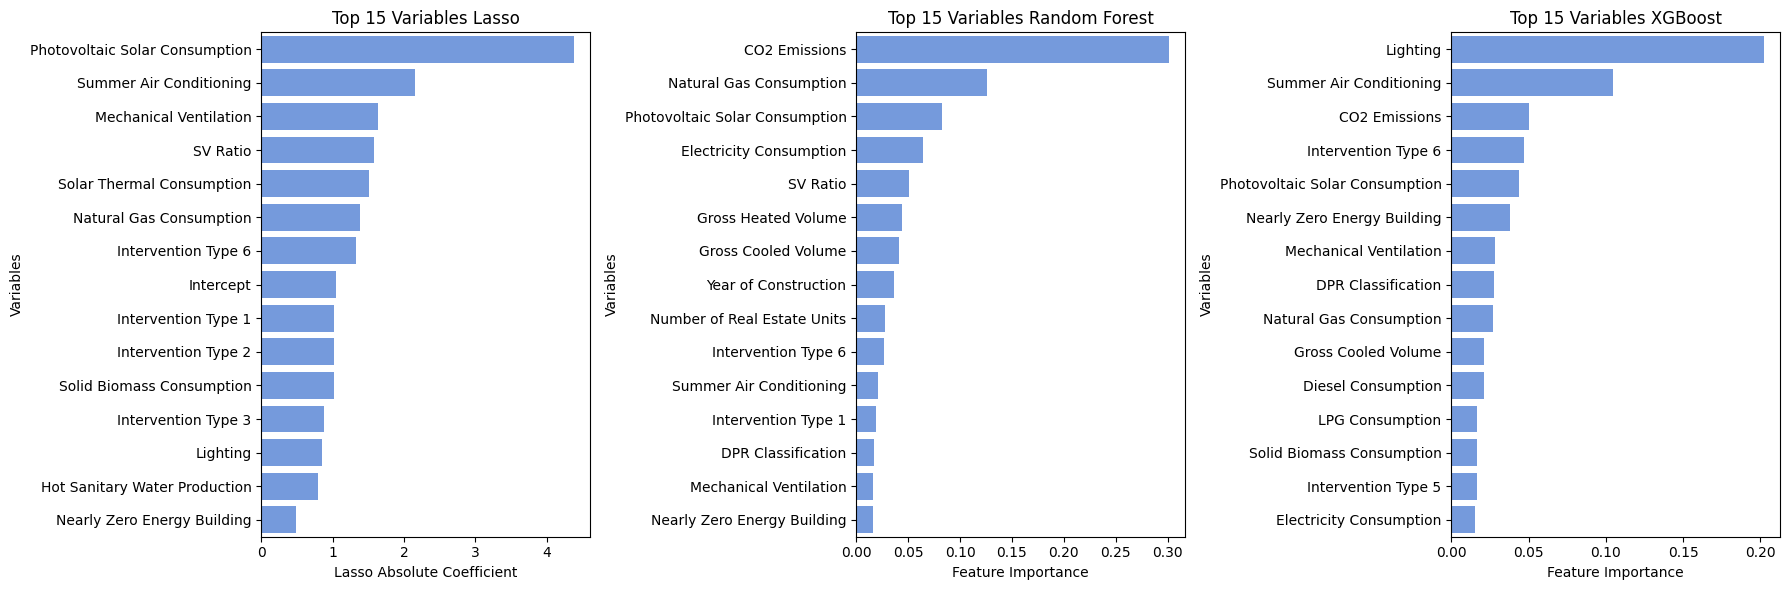

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Set up the figure and axes for three subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # (1 row, 3 columns)

# First plot
sns.barplot(y=top_15_lasso["Variable"], x=top_15_lasso["Coefficient"], color="cornflowerblue", ax=axes[0])
axes[0].set_title("Top 15 Variables Lasso")
axes[0].set_xlabel("Lasso Absolute Coefficient")
axes[0].set_ylabel("Variables")

# Second plot (example: you can adjust this with different data or plotting styles)
sns.barplot(y=top_15_rf["feature"], x=top_15_rf["Feature Importance"], color="cornflowerblue", ax=axes[1])
axes[1].set_title("Top 15 Variables Random Forest")
axes[1].set_xlabel("Feature Importance")
axes[1].set_ylabel("Variables")

# Third plot (example: different style or data)
sns.barplot(y=top_15_xgb["Feature"], x=top_15_xgb["Feature Importance"], color="cornflowerblue", ax=axes[2])
axes[2].set_title("Top 15 Variables XGBoost")
axes[2].set_xlabel("Feature Importance")
axes[2].set_ylabel("Variables")

# Adjust layout for better display
plt.tight_layout()

# Show the plots
plt.show()